### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

### Read the data

In [2]:
data = pd.read_csv('signal-data.csv')

### Shape of the data

In [3]:
data.shape

(1567, 592)

### Peek into the data

In [4]:
data.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

#### Looks like all the features are numeric with several missing values

### look into the 5 point summary

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


### Check for missing values

In [8]:
data.isnull().sum()

Time            0
0               6
1               7
2              14
3              14
4              14
5              14
6              14
7               9
8               2
9               2
10              2
11              2
12              2
13              3
14              3
15              3
16              3
17              3
18              3
19             10
20              0
21              2
22              2
23              2
24              2
25              2
26              2
27              2
28              2
29              2
30              2
31              2
32              1
33              1
34              1
35              1
36              1
37              1
38              1
39              1
40             24
41             24
42              1
43              1
44              1
45              1
46              1
47              1
48              1
49              1
50              1
51              1
52              1
53              4
54        

#### There are several missing values

### We can drop the time column as well as columns which has more than 50% of null values

In [9]:
null = data.isnull().sum().to_frame()
null.columns = ['Null count']
null

Null count
Time                0
0                   6
1                   7
2                  14
3                  14
4                  14
5                  14
6                  14
7                   9
8                   2
9                   2
10                  2
11                  2
12                  2
13                  3
14                  3
15                  3
16                  3
17                  3
18                  3
19                 10
20                  0
21                  2
22                  2
23                  2
24                  2
25                  2
26                  2
27                  2
28                  2
29                  2
30                  2
31                  2
32                  1
33                  1
34                  1
35                  1
36                  1
37                  1
38                  1
39                  1
40                 24
41                 24
42                  1
43                  1
44                  1
45                  1
46                  1
47                  1
48                  1
49                  1
50                  1
51                  1
52                  1
53                  4
54                  4
55                  4
56                  4
57                  4
58                  4
59                  7
60                  6
61                  6
62                  6
63                  7
64                  7
65                  7
66                  6
67                  6
68                  6
69                  6
70                  6
71                  6
72                794
73                794
74                  6
75                 24
76                 24
77                 24
78                 24
79                 24
80                 24
81                 24
82                 24
83                  1
84                 12
85               1341
86                  0
87                  0
88                  0
89                 51
90                 51
91                  6
92                  2
93                  2
94                  6
95                  6
96                  6
97                  6
98                  6
99                  6
100                 6
101                 6
102                 6
103                 2
104                 2
105                 6
106                 6
107                 6
108                 6
109              1018
110              1018
111              1018
112               715
113                 0
114                 0
115                 0
116                 0
117                 0
118                24
119                 0
120                 0
121                 9
122                 9
123                 9
124                 9
125                 9
126                 9
127                 9
128                 9
129                 9
130                 9
131                 9
132                 8
133                 8
134                 8
135                 5
136                 6
137                 7
138                14
139                14
140                14
141                14
142                14
143                 9
144                 2
145                 2
146                 2
147                 2
148                 2
149                 3
150                 3
151                 3
152                 3
153                 3
154                 3
155                10
156                 0
157              1429
158              1429
159                 2
160                 2
161                 2
162                 2
163                 2
164                 2
165                 2
166                 2
167                 2
168                 2
169                 2
170                 1
171                 1
172                 1
173                 1
174                 1
175                 1
176                 1
177                 1
178                24
179                 1
180    

In [10]:
drop_columns = list(null[null['Null count'] > data.shape[0]/2].index)
data.drop(drop_columns, axis = 1, inplace = True)
data.drop(['Time'], axis = 1, inplace = True)
data.shape

(1567, 563)

In [11]:
for i in data.columns:
    data.loc[data[i].isnull(), i] = data[i].median()

#### Replace null value using median because dropping the features might lose information

In [12]:
data.head()

0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...      577     582     583     584      585     586  \
0  1.5005  0.0162  ...  14.9509  0.5005  0.0118  0.0035   2.3630  0.0205   
1  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   4.4447  0.0096   
2  1.4436  0.0041  ...   9.2721  0.4958  0.0157  0.0039   3.1745  0.0584   
3  1.4882 -0.0124  ...   8.5831  0.4990  0.0103  0.0025   2.0544  0.0202   
4  1.5031 -0.0031  ...  10.9698  0.4800  0.4766  0.1045  99.3032  0.0202   

      587     588       589  Pass/Fail  
0  0.0148  0.0046   71.9005       -1.0  
1  0.0201  0.0060  208.2045       -1.0  
2  0.0484  0.0148   82.8602        1.0  
3  0.0149  0.0044   73.8432       -1.0  
4  0.0149  0.0044   73.8432       -1.0  

[5 rows x 563 columns]

In [13]:
data['Pass/Fail'].value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

### There are 1463 pass and 104 fail data

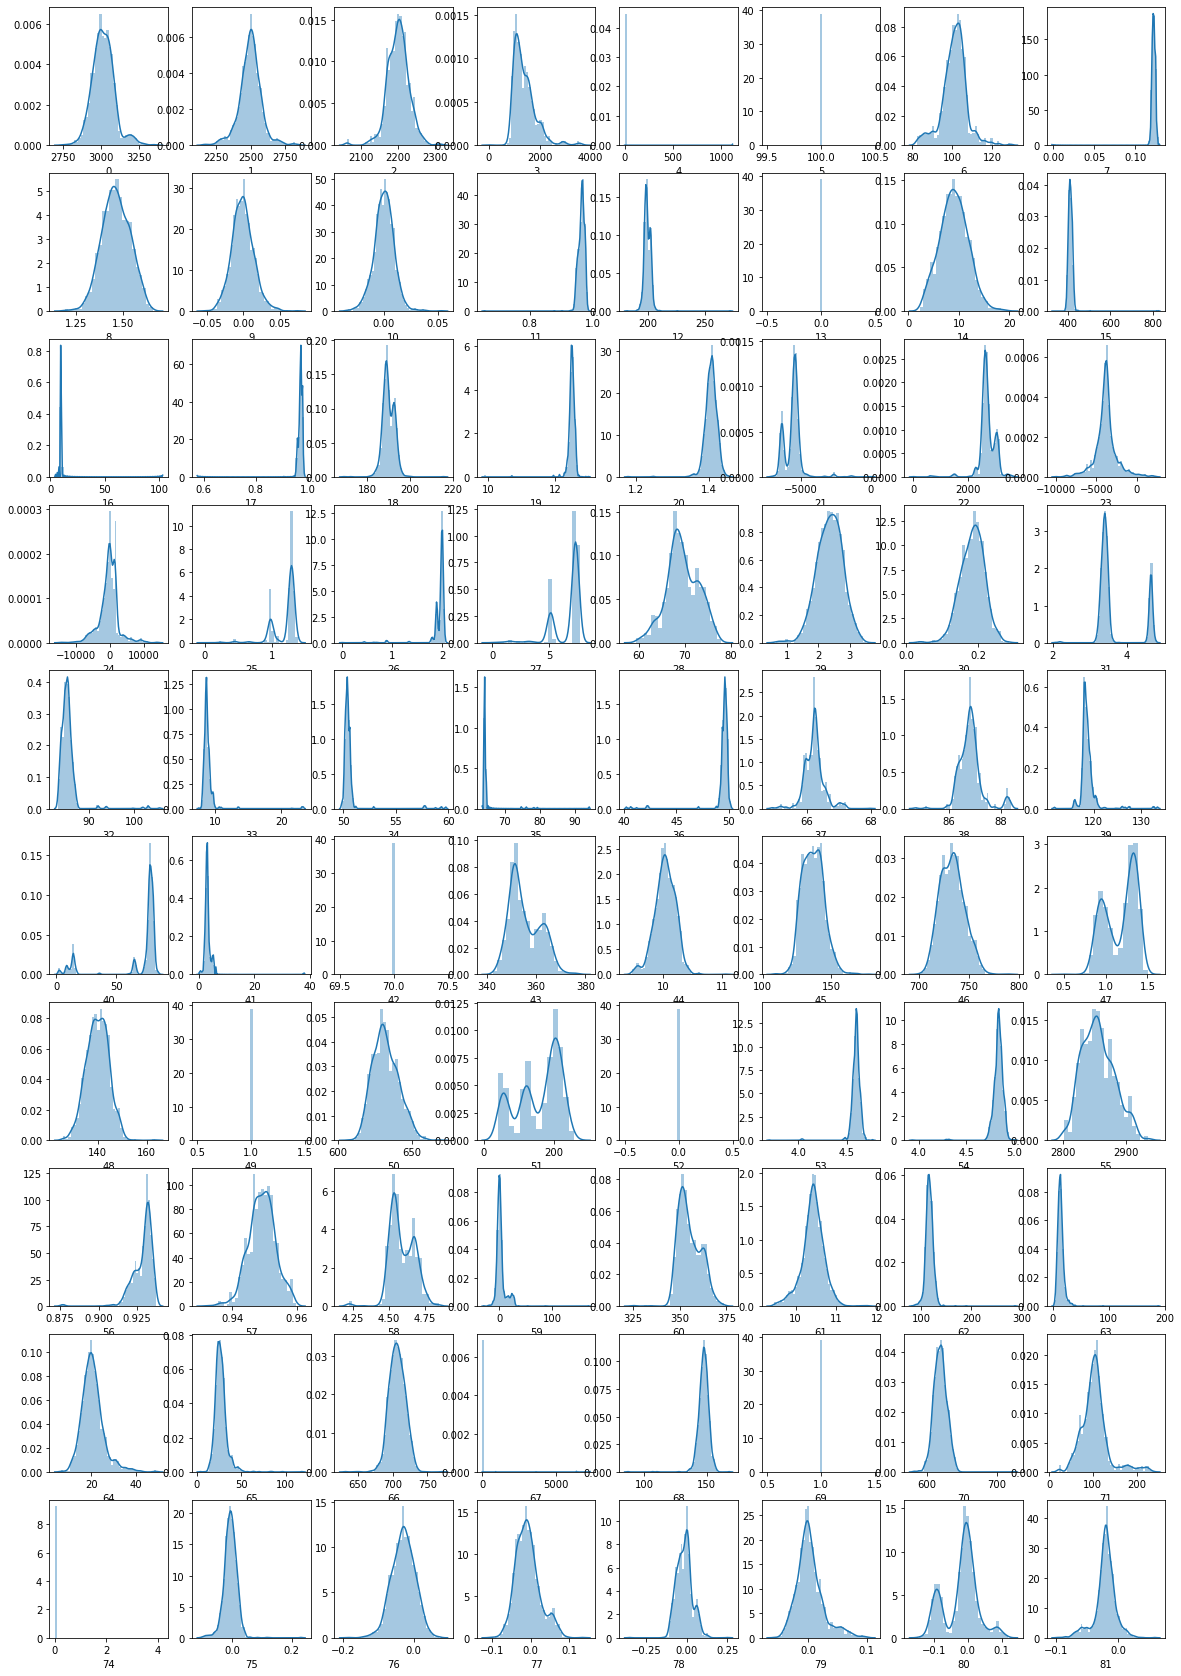

In [14]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(10,8, figsize = (20,30))
col = 0
for r in range(10):
    for c in range(8):
        sns.distplot(data[data.columns[col]], ax = ax[r][c])
        col += 1

### The above is the distribution plot for the first 80 columns. There are several columns which follow normal distribution. Columns such as 21, 22, 25, 27, 31, 43, 47, 51, 58, 80 are having more than 2 peaks which indicates that there can be few clusters present in the data. 

### There are columns which are not distributed. columns such as 5, 13, 42, 49, 52, 69, 74 are having almost single value and columns 4, 67 are having obvious outliers, which may not be helpful in predicting the output

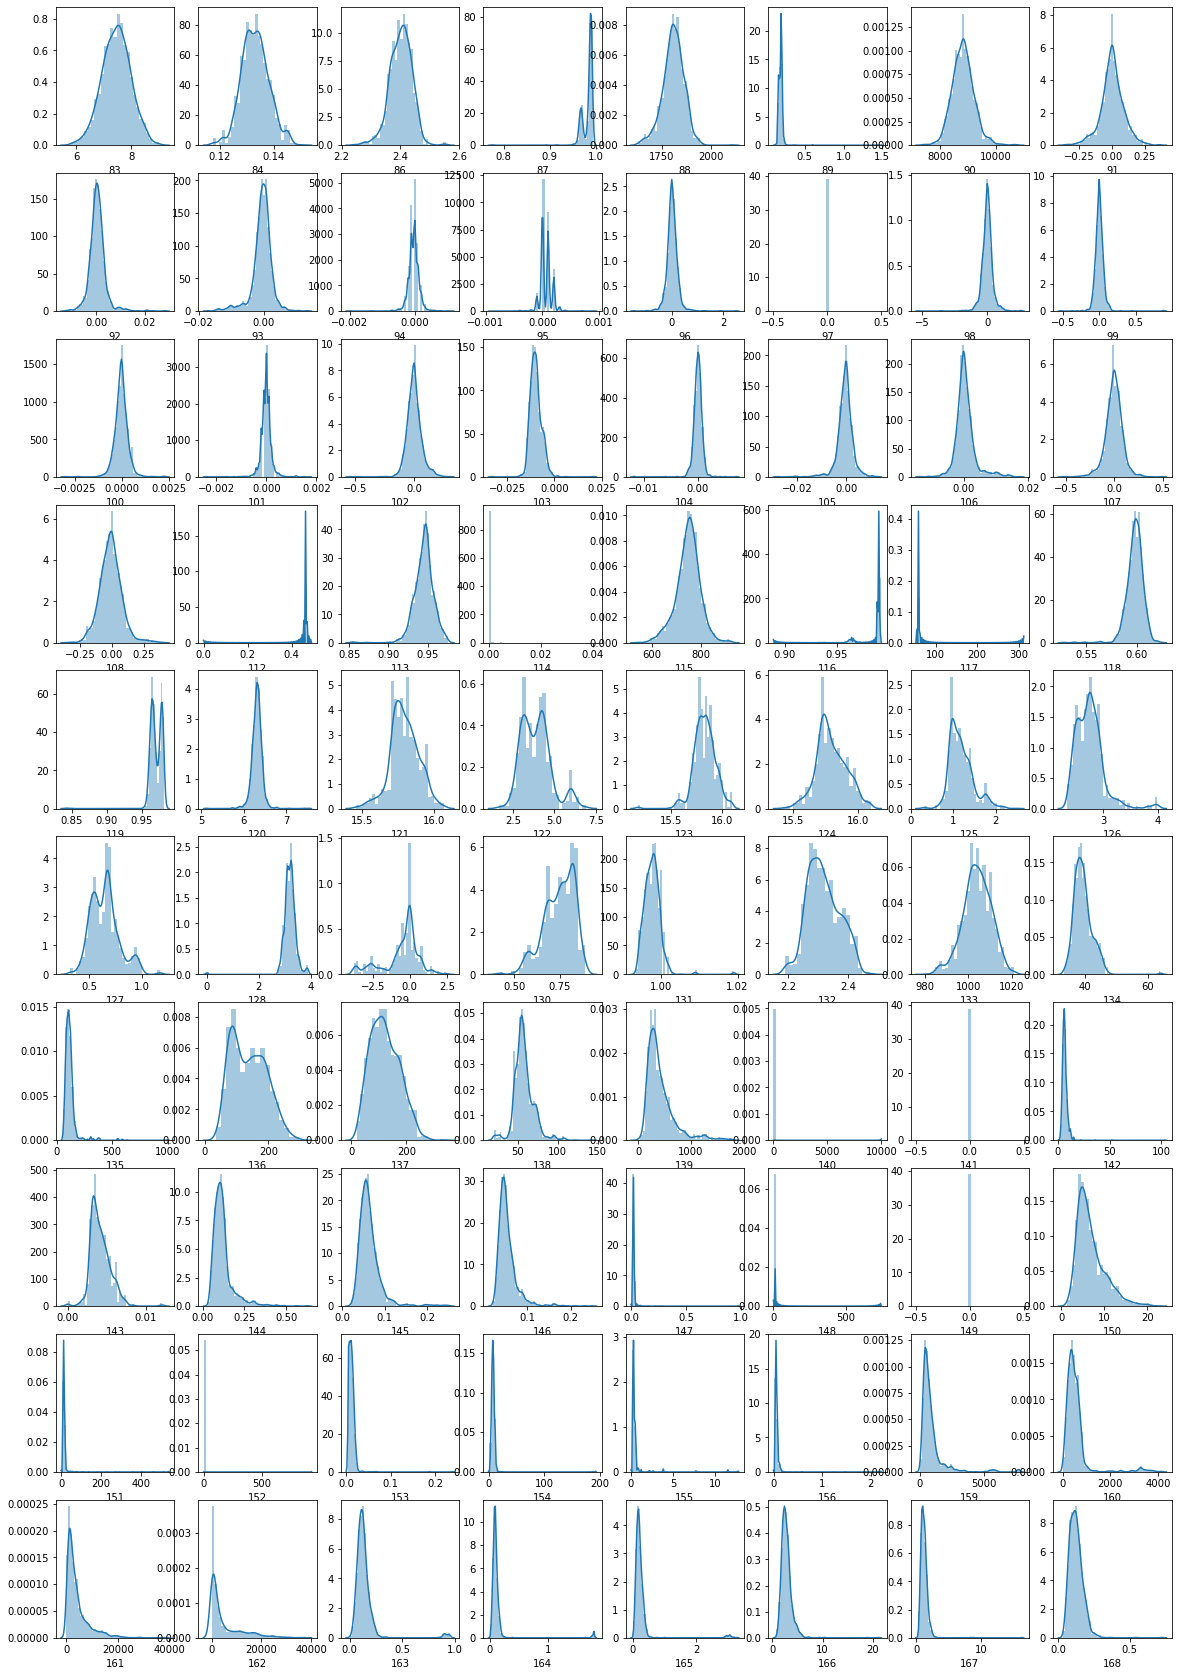

In [15]:
fig, ax = plt.subplots(10,8, figsize = (20,30))
col = 81
for r in range(10):
    for c in range(8):
        sns.distplot(data[data.columns[col]], ax = ax[r][c])
        col += 1

### columns such as 97, 114, 141, 149  are having almost single value and columns 140, 152 are having obvious outliers, which may not be helpful in predicting the output

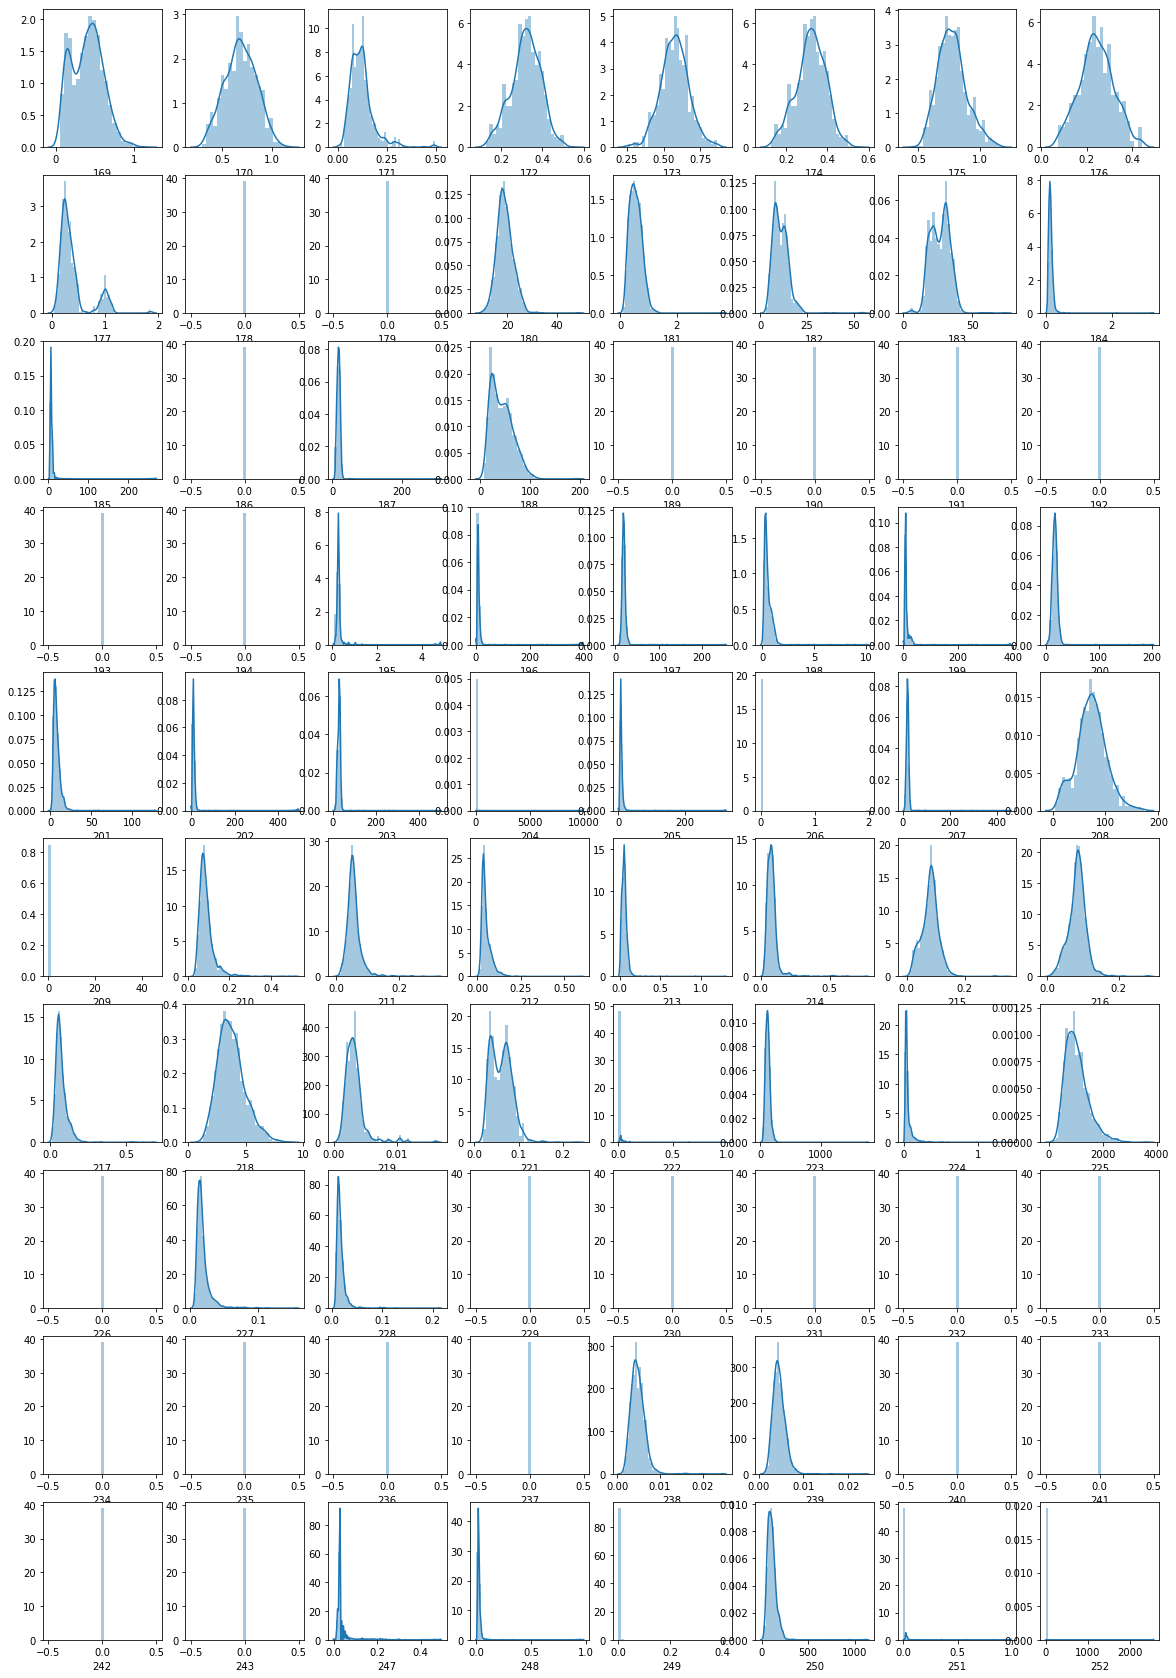

In [16]:
fig, ax = plt.subplots(10,8, figsize = (20,30))
col = 161
for r in range(10):
    for c in range(8):
        sns.distplot(data[data.columns[col]], ax = ax[r][c])
        col += 1

### columns such as 178, 179, 186, 189, 190, 191, 192, 193, 194, 206, 209, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 249  are having almost single value and columns 204, 251, 252 are having obvious outliers, which may not be helpful in predicting the output

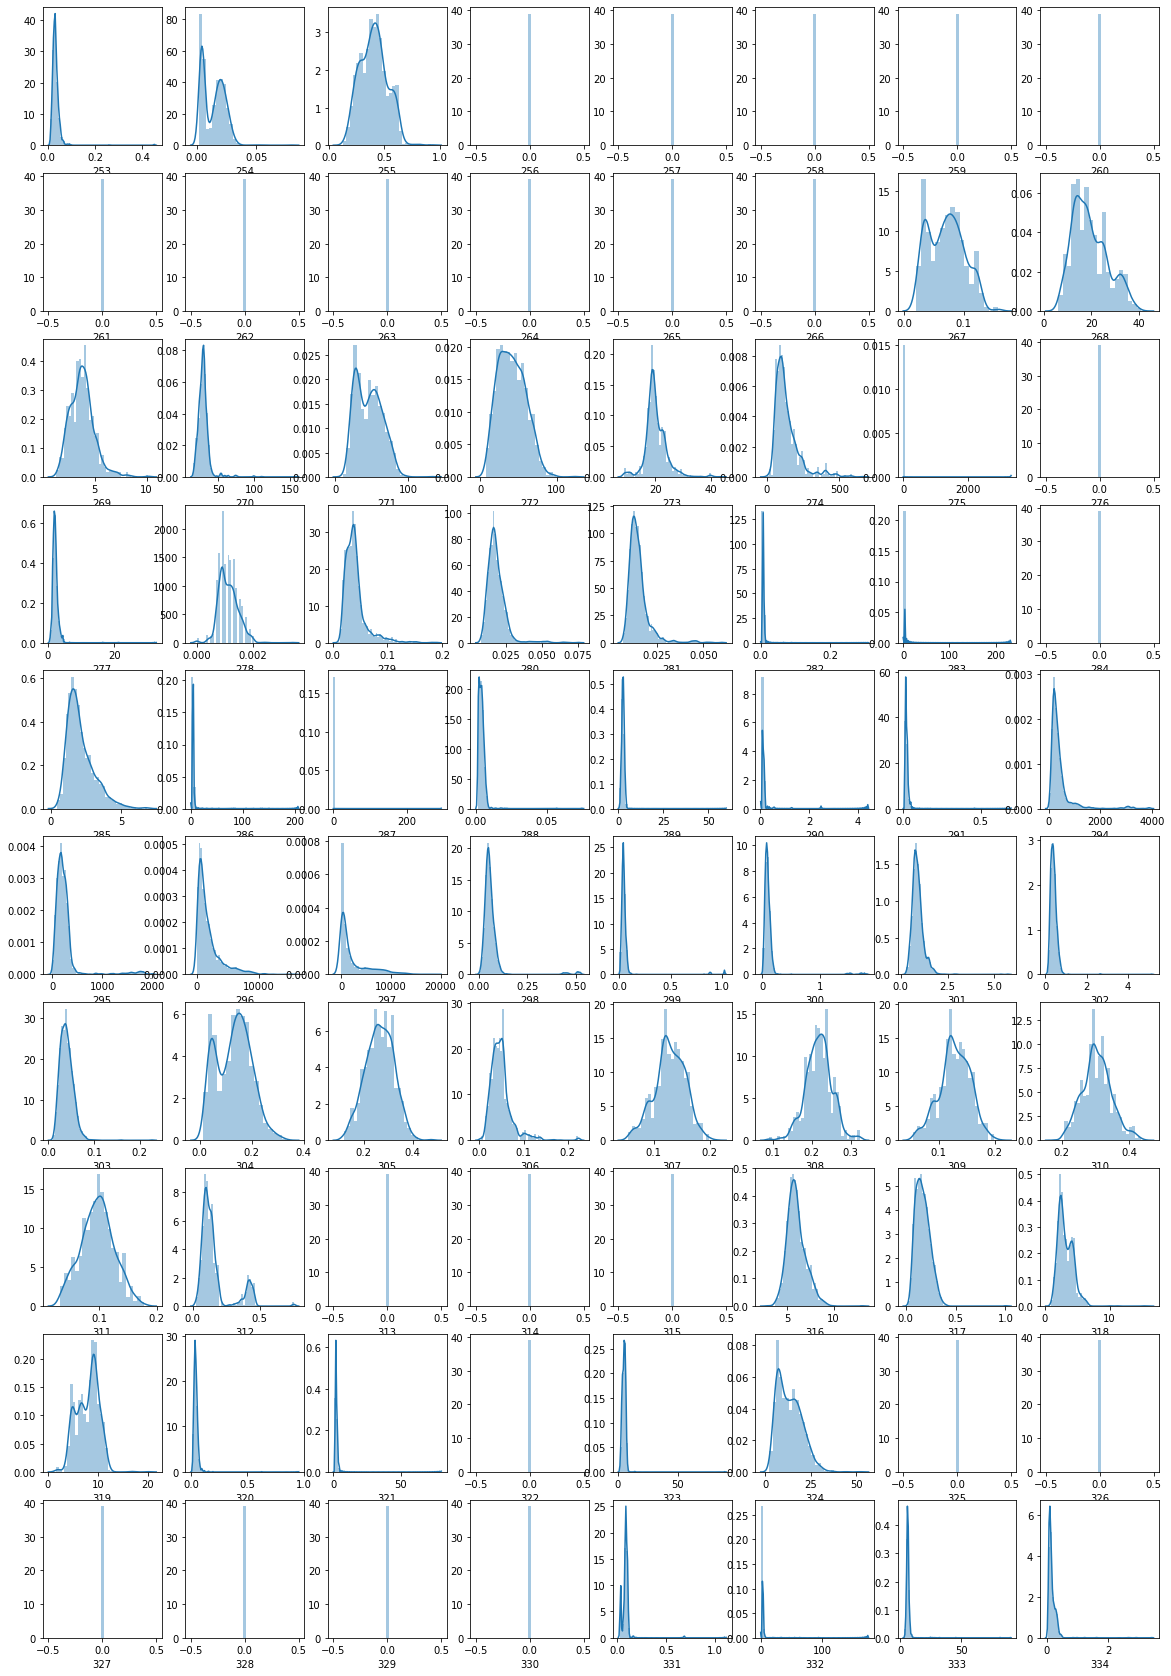

In [17]:
fig, ax = plt.subplots(10,8, figsize = (20,30))
col = 241
for r in range(10):
    for c in range(8):
        sns.distplot(data[data.columns[col]], ax = ax[r][c])
        col += 1

### columns such as 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 276, 284, 313, 314, 315, 322, 325, 326, 327, 328, 329, 330 are having almost single value and columns 275, 287  are having obvious outliers, which may not be helpful in predicting the output

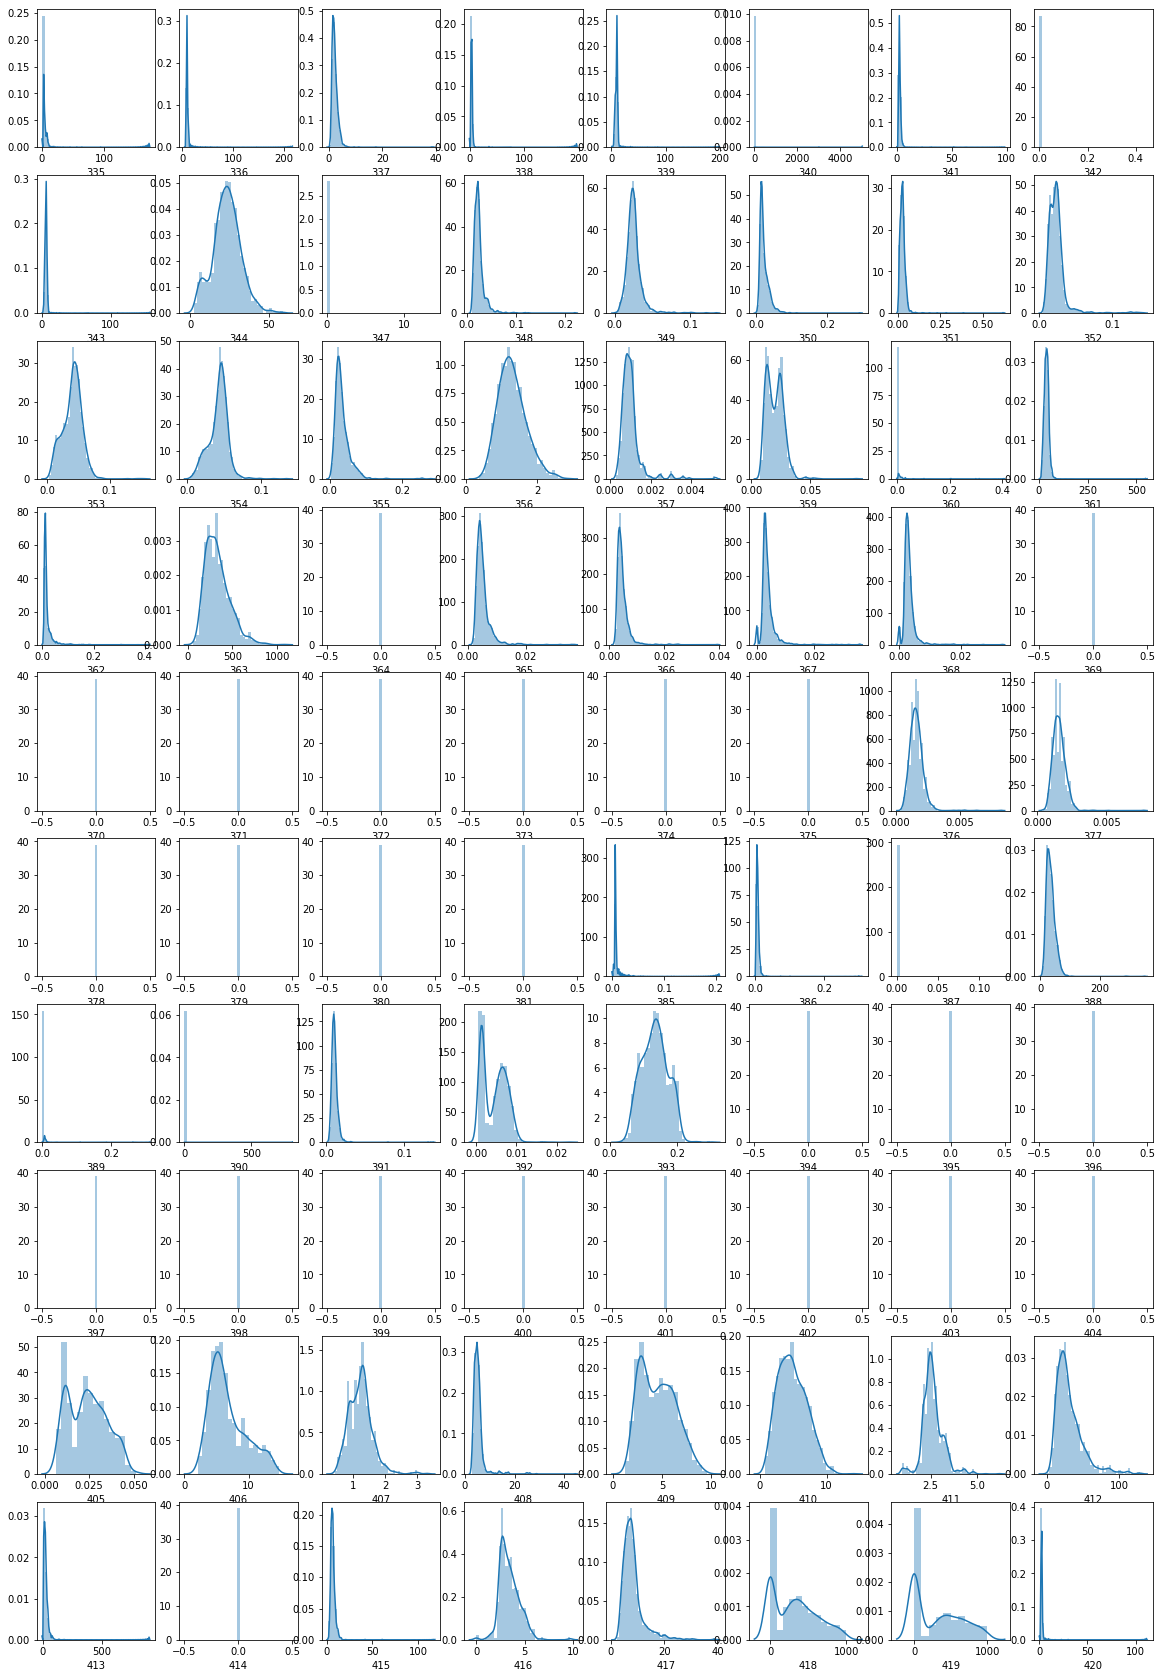

In [18]:
fig, ax = plt.subplots(10,8, figsize = (20,30))
col = 321
for r in range(10):
    for c in range(8):
        sns.distplot(data[data.columns[col]], ax = ax[r][c])
        col += 1

### columns such as 342, 347, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 387, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 414 are having almost single value and columns 340, 390  are having obvious outliers, which may not be helpful in predicting the output

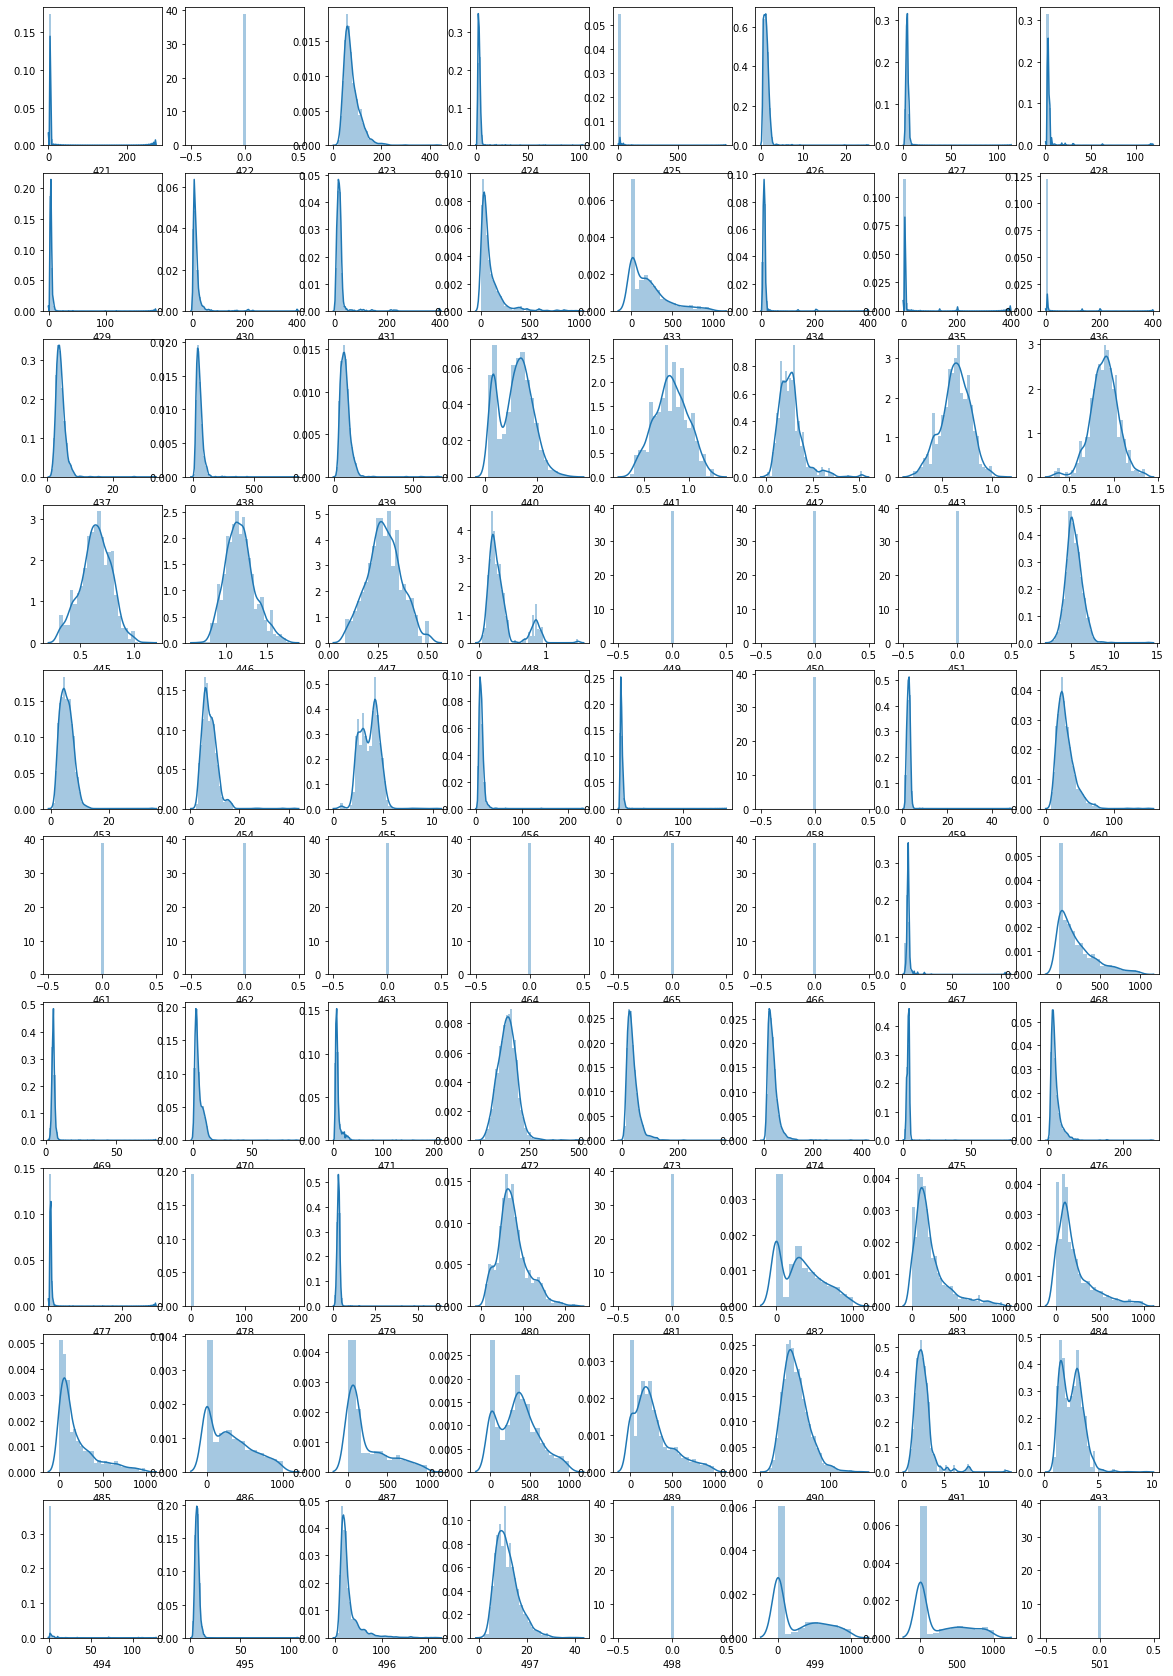

In [19]:
fig, ax = plt.subplots(10,8, figsize = (20,30))
col = 401
for r in range(10):
    for c in range(8):
        sns.distplot(data[data.columns[col]], ax = ax[r][c])
        col += 1

### columns such as 422, 449, 450, 451, 458, 461, 462, 463, 464, 465, 466, 478, 481, 598, 501  are having almost single value and columns 425, 494  are having obvious outliers, which may not be helpful in predicting the output

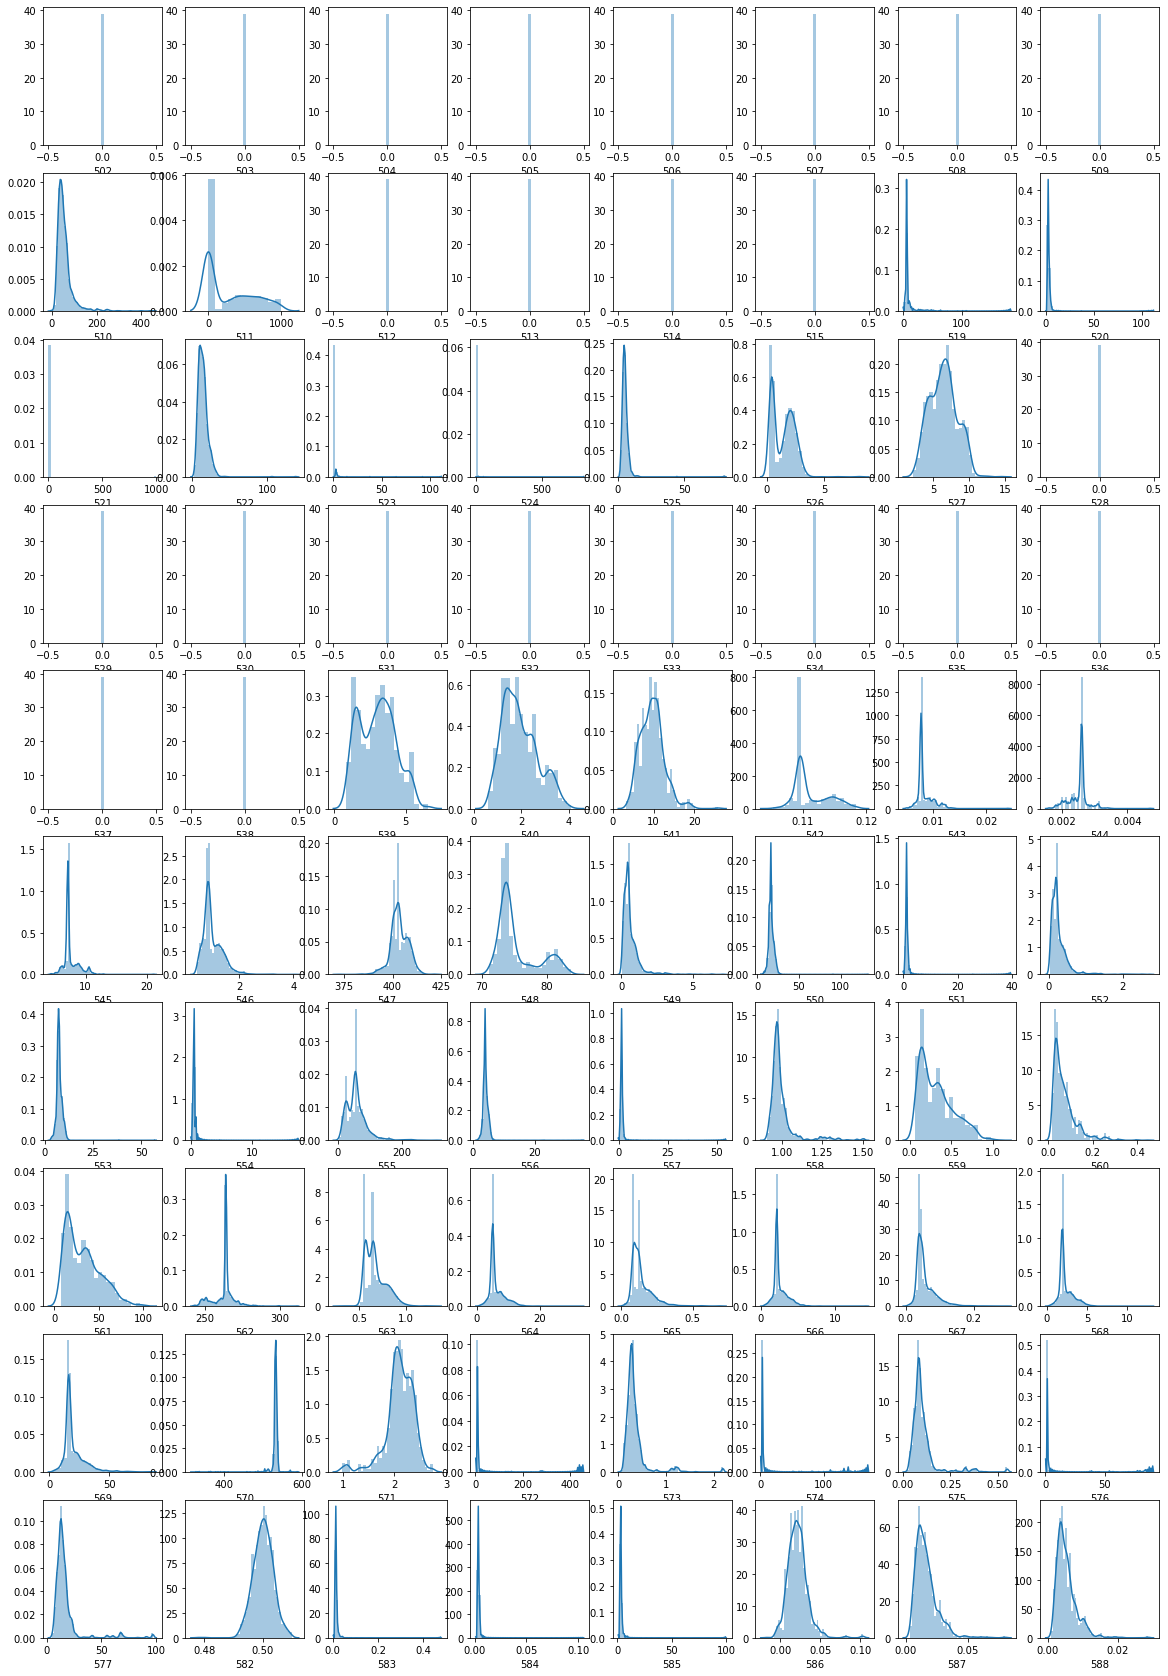

In [20]:
fig, ax = plt.subplots(10,8, figsize = (20,30))
col = 481
for r in range(10):
    for c in range(8):
        sns.distplot(data[data.columns[col]], ax = ax[r][c])
        col += 1

### columns such as 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538  are having almost single value and columns 521  are having obvious outliers, which may not be helpful in predicting the output

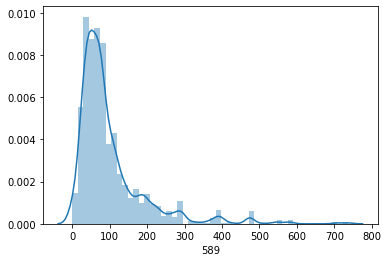

In [21]:
sns.distplot(data[data.columns[561]])

### Replace Outlier with median where there are very huge difference from median

In [22]:
zscore_data = round(pd.DataFrame(zscore(data)),0)
outlier_rows = [4, 67, 140, 152, 204, 251, 252, 275, 287, 340, 390, 425, 494, 521]

In [23]:
for r in outlier_rows:
    data.loc[list(zscore_data[zscore_data[r] >= 3].index), str(r)] = data[str(r)].median()

### Drop all the columns which has almost single values only, since it will not affect the accuracy

In [24]:
data.drop(['5', '13', '42', '49', '52', '69', '74'], axis = 1, inplace = True)

In [25]:
data.drop(['97', '114', '141', '149'], axis = 1, inplace = True)

In [26]:
data.drop(['178', '179', '186', '189', '190', '191', '192', '193', '194', '206', '209', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '249'], axis = 1, inplace = True)

In [27]:
data.drop(['256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330'], axis = 1, inplace = True)

In [28]:
data.drop(['342', '347', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '387', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414'], axis = 1, inplace = True)

In [29]:
data.drop(['422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '478', '481', '498', '501'], axis = 1, inplace = True)

In [30]:
data.drop(['502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '521', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'], axis = 1, inplace = True)

In [31]:
data.shape

(1567, 437)

In [32]:
corr = data.corr()
corr

0         1         2         3         4         6  \
0          1.000000 -0.144161  0.004667 -0.006665  0.014168  0.002028   
1         -0.144161  1.000000  0.005883 -0.008963  0.021881 -0.025222   
2          0.004667  0.005883  1.000000  0.298810 -0.019384 -0.136212   
3         -0.006665 -0.008963  0.298810  1.000000  0.182516 -0.685773   
4          0.014168  0.021881 -0.019384  0.182516  1.000000 -0.134302   
6          0.002028 -0.025222 -0.136212 -0.685773 -0.134302  1.000000   
7          0.031347 -0.011761 -0.147116  0.086965  0.017796  0.009606   
8         -0.052735  0.031244  0.023524 -0.102839  0.048445  0.087803   
9          0.009091  0.024025  0.016248  0.066987  0.012631 -0.049039   
10         0.006445  0.009529  0.069902  0.049785  0.000088 -0.005373   
11         0.043432 -0.027042  0.036368  0.039943  0.013314 -0.017991   
12         0.010571  0.034308  0.018359 -0.028949 -0.032540  0.059344   
14        -0.007191 -0.037730  0.006494 -0.020144 -0.011829  0.055416   
15         0.030745 -0.087226  0.006116 -0.013440  0.018044  0.039898   
16        -0.005720 -0.001812 -0.000805 -0.004475  0.023992  0.039989   
17         0.012496 -0.010076 -0.004898  0.042937  0.011336 -0.012626   
18         0.017997  0.043390  0.021890 -0.029514 -0.058254  0.033455   
19        -0.009350 -0.003172 -0.026671  0.040384  0.037455 -0.006604   
20         0.025773  0.032532  0.015437  0.037980  0.000996 -0.035152   
21        -0.011373  0.058213  0.044653  0.020765  0.033440 -0.021041   
22         0.032438 -0.052712 -0.029961 -0.033073 -0.056776  0.035572   
23        -0.046631 -0.015985  0.009196 -0.006984  0.031332  0.012792   
24        -0.015075 -0.059887 -0.021048 -0.049871 -0.087216  0.057551   
25         0.107802  0.004832 -0.025910  0.078607  0.041192 -0.097849   
26         0.092542 -0.023953 -0.027251  0.035440 -0.005615 -0.046742   
27         0.106749  0.003840 -0.025128  0.084145  0.048207 -0.104549   
28         0.054828 -0.022899 -0.061773  0.096031  0.119097 -0.107191   
29        -0.030918  0.001764  0.049783 -0.013284 -0.022732  0.053751   
30        -0.039741  0.052170  0.062159  0.001784 -0.033115  0.028554   
31        -0.055994 -0.051542 -0.007950 -0.107694 -0.066772  0.115697   
32        -0.004630 -0.044621 -0.023447 -0.020255 -0.013575  0.005099   
33        -0.034015 -0.021594 -0.043049 -0.040988 -0.052788  0.002634   
34        -0.017629 -0.060610  0.003867 -0.005983  0.020140 -0.010233   
35        -0.004498 -0.065810  0.015026  0.056176  0.031369 -0.062432   
36         0.017628  0.060611 -0.003868  0.005984 -0.020141  0.010233   
37        -0.035530 -0.008617 -0.003267  0.000569 -0.022567 -0.037720   
38        -0.042294  0.008524 -0.009020 -0.052534 -0.029305  0.034622   
39        -0.034852 -0.055925 -0.004802  0.020904 -0.000020  0.006074   
40        -0.006758  0.028232 -0.012922 -0.005794  0.032978  0.013267   
41         0.040578 -0.017729 -0.015081 -0.020068 -0.023661 -0.009361   
43        -0.050537 -0.020209  0.050638 -0.023118  0.022912  0.011090   
44         0.053885  0.005930 -0.091982  0.064861  0.026742 -0.064925   
45         0.015588  0.017978  0.005947 -0.032105  0.035331  0.030165   
46        -0.006072  0.008007  0.010267 -0.043843  0.049815  0.030826   
47        -0.037488  0.019765 -0.041489 -0.000062  0.016633  0.005000   
48         0.004239  0.005557 -0.096099 -0.022463 -0.020910  0.026392   
50        -0.019961  0.004848 -0.008427 -0.057645  0.037714  0.049151   
51        -0.050516  0.023216 -0.016603 -0.012708 -0.016701  0.052906   
53         0.014775 -0.034694 -0.001070 -0.049702 -0.080034  0.027084   
54         0.022436 -0.046867  0.015645 -0.047006 -0.063582  0.013854   
55        -0.025070  0.016996 -0.007971 -0.016276  0.006893  0.013221   
56         0.015531  0.001139 -0.018766 -0.028253 -0.107569  0.029615   
57        -0.021465  0.037361 -0.046616 -0.004177 -0.043083  0.034840   
58        -0.012648 -0.025777  0.014790  0.033475 -0.077480 -0.051740   
59 

### Dropping the columns which has correlation of above 0.9% to reduce dimensions

In [33]:
data_reduced = data.copy()
corr_list = []
for r in corr.columns:
    if len(corr[(corr[str(r)] > 0.9) | (corr[str(r)] < -0.9)][str(r)]) > 1:
        for i in list(corr[(corr[str(r)] > 0.9) | (corr[str(r)] < -0.9)][str(r)].index):
            if i != str(r):
                try:                      
                    data_reduced.drop(i, axis = 1, inplace = True)
                    corr_list.append(i)                
                except:
                    continue

In [34]:
data_reduced.shape

(1567, 142)

In [35]:
data.shape

(1567, 437)

In [36]:
corr_list

['148',
 '152',
 '283',
 '287',
 '421',
 '425',
 '27',
 '25',
 '36',
 '34',
 '50',
 '46',
 '54',
 '53',
 '70',
 '66',
 '105',
 '106',
 '96',
 '94',
 '101',
 '104',
 '98',
 '99',
 '92',
 '93',
 '252',
 '390',
 '524',
 '123',
 '127',
 '121',
 '122',
 '270',
 '408',
 '271',
 '409',
 '272',
 '410',
 '273',
 '411',
 '274',
 '275',
 '413',
 '277',
 '415',
 '278',
 '416',
 '279',
 '417',
 '280',
 '281',
 '282',
 '420',
 '16',
 '154',
 '289',
 '427',
 '285',
 '286',
 '424',
 '288',
 '426',
 '290',
 '428',
 '291',
 '429',
 '294',
 '295',
 '296',
 '297',
 '164',
 '298',
 '299',
 '300',
 '163',
 '165',
 '435',
 '436',
 '301',
 '437',
 '302',
 '303',
 '304',
 '440',
 '305',
 '441',
 '306',
 '442',
 '174',
 '307',
 '309',
 '443',
 '445',
 '308',
 '444',
 '172',
 '310',
 '446',
 '311',
 '447',
 '312',
 '448',
 '452',
 '317',
 '453',
 '318',
 '454',
 '319',
 '455',
 '320',
 '456',
 '321',
 '457',
 '323',
 '459',
 '324',
 '331',
 '467',
 '199',
 '207',
 '332',
 '335',
 '336',
 '343',
 '479',
 '333',
 

#### 295 columns have been dropped

In [37]:
data_reduced['Pass/Fail']

0      -1.0
1      -1.0
2       1.0
3      -1.0
4      -1.0
5      -1.0
6      -1.0
7      -1.0
8      -1.0
9      -1.0
10      1.0
11      1.0
12     -1.0
13     -1.0
14      1.0
15     -1.0
16     -1.0
17     -1.0
18     -1.0
19     -1.0
20     -1.0
21     -1.0
22     -1.0
23      1.0
24     -1.0
25     -1.0
26     -1.0
27     -1.0
28     -1.0
29     -1.0
30     -1.0
31     -1.0
32     -1.0
33     -1.0
34     -1.0
35     -1.0
36     -1.0
37     -1.0
38      1.0
39     -1.0
40      1.0
41     -1.0
42     -1.0
43     -1.0
44     -1.0
45      1.0
46     -1.0
47     -1.0
48      1.0
49      1.0
50      1.0
51     -1.0
52     -1.0
53     -1.0
54     -1.0
55     -1.0
56     -1.0
57      1.0
58      1.0
59     -1.0
60     -1.0
61     -1.0
62      1.0
63     -1.0
64      1.0
65     -1.0
66     -1.0
67     -1.0
68     -1.0
69     -1.0
70     -1.0
71     -1.0
72     -1.0
73     -1.0
74     -1.0
75     -1.0
76     -1.0
77     -1.0
78     -1.0
79     -1.0
80     -1.0
81     -1.0
82      1.0
83  

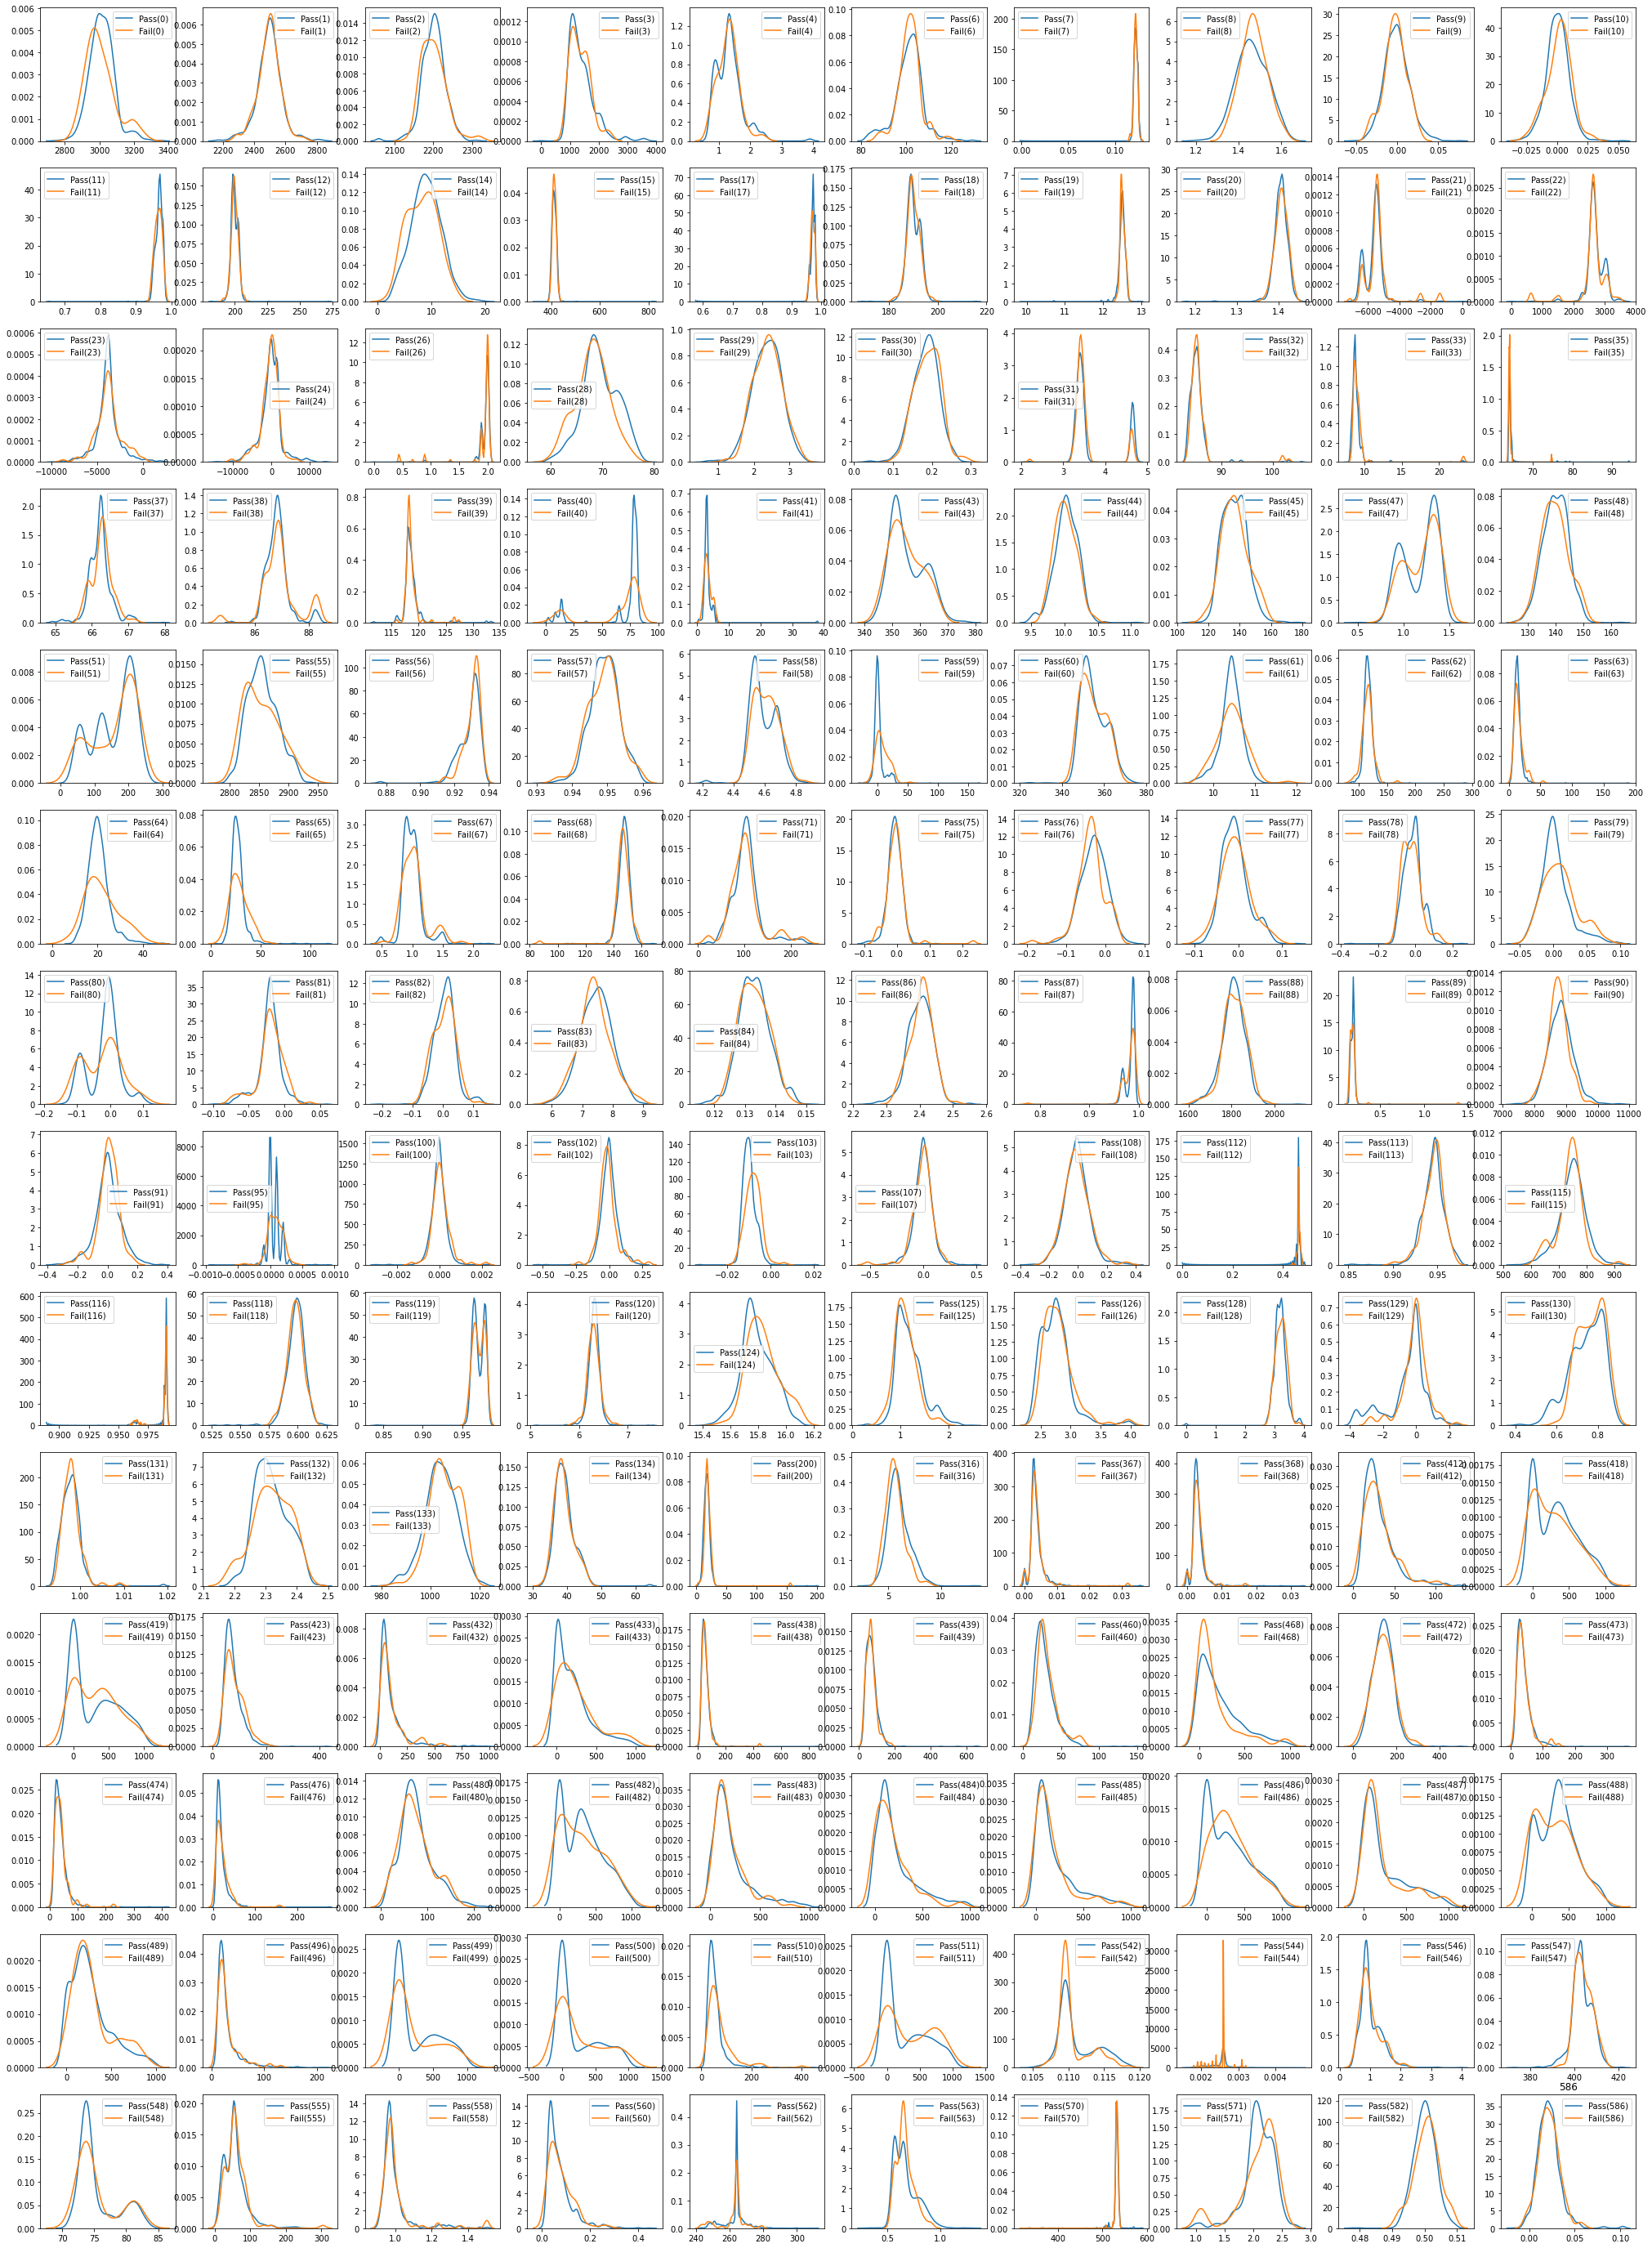

In [38]:
fig, ax = plt.subplots(14,10, figsize = (35,50))
col = 0
for r in range(14):
    for c in range(10):
        sns.kdeplot(data_reduced[data_reduced['Pass/Fail'] == -1.0][data_reduced.columns[col]], ax = ax[r][c], label = 'Pass(' + data_reduced.columns[col] + ')')
        sns.kdeplot(data_reduced[data_reduced['Pass/Fail'] == 1.0][data_reduced.columns[col]], ax = ax[r][c], label = 'Fail(' + data_reduced.columns[col] + ')')
        plt.title(data_reduced.columns[col])
        col += 1

### Almost all the features have same split for both pass and fail, except a few (40, 59, 64, 65, 80, 95, 419)

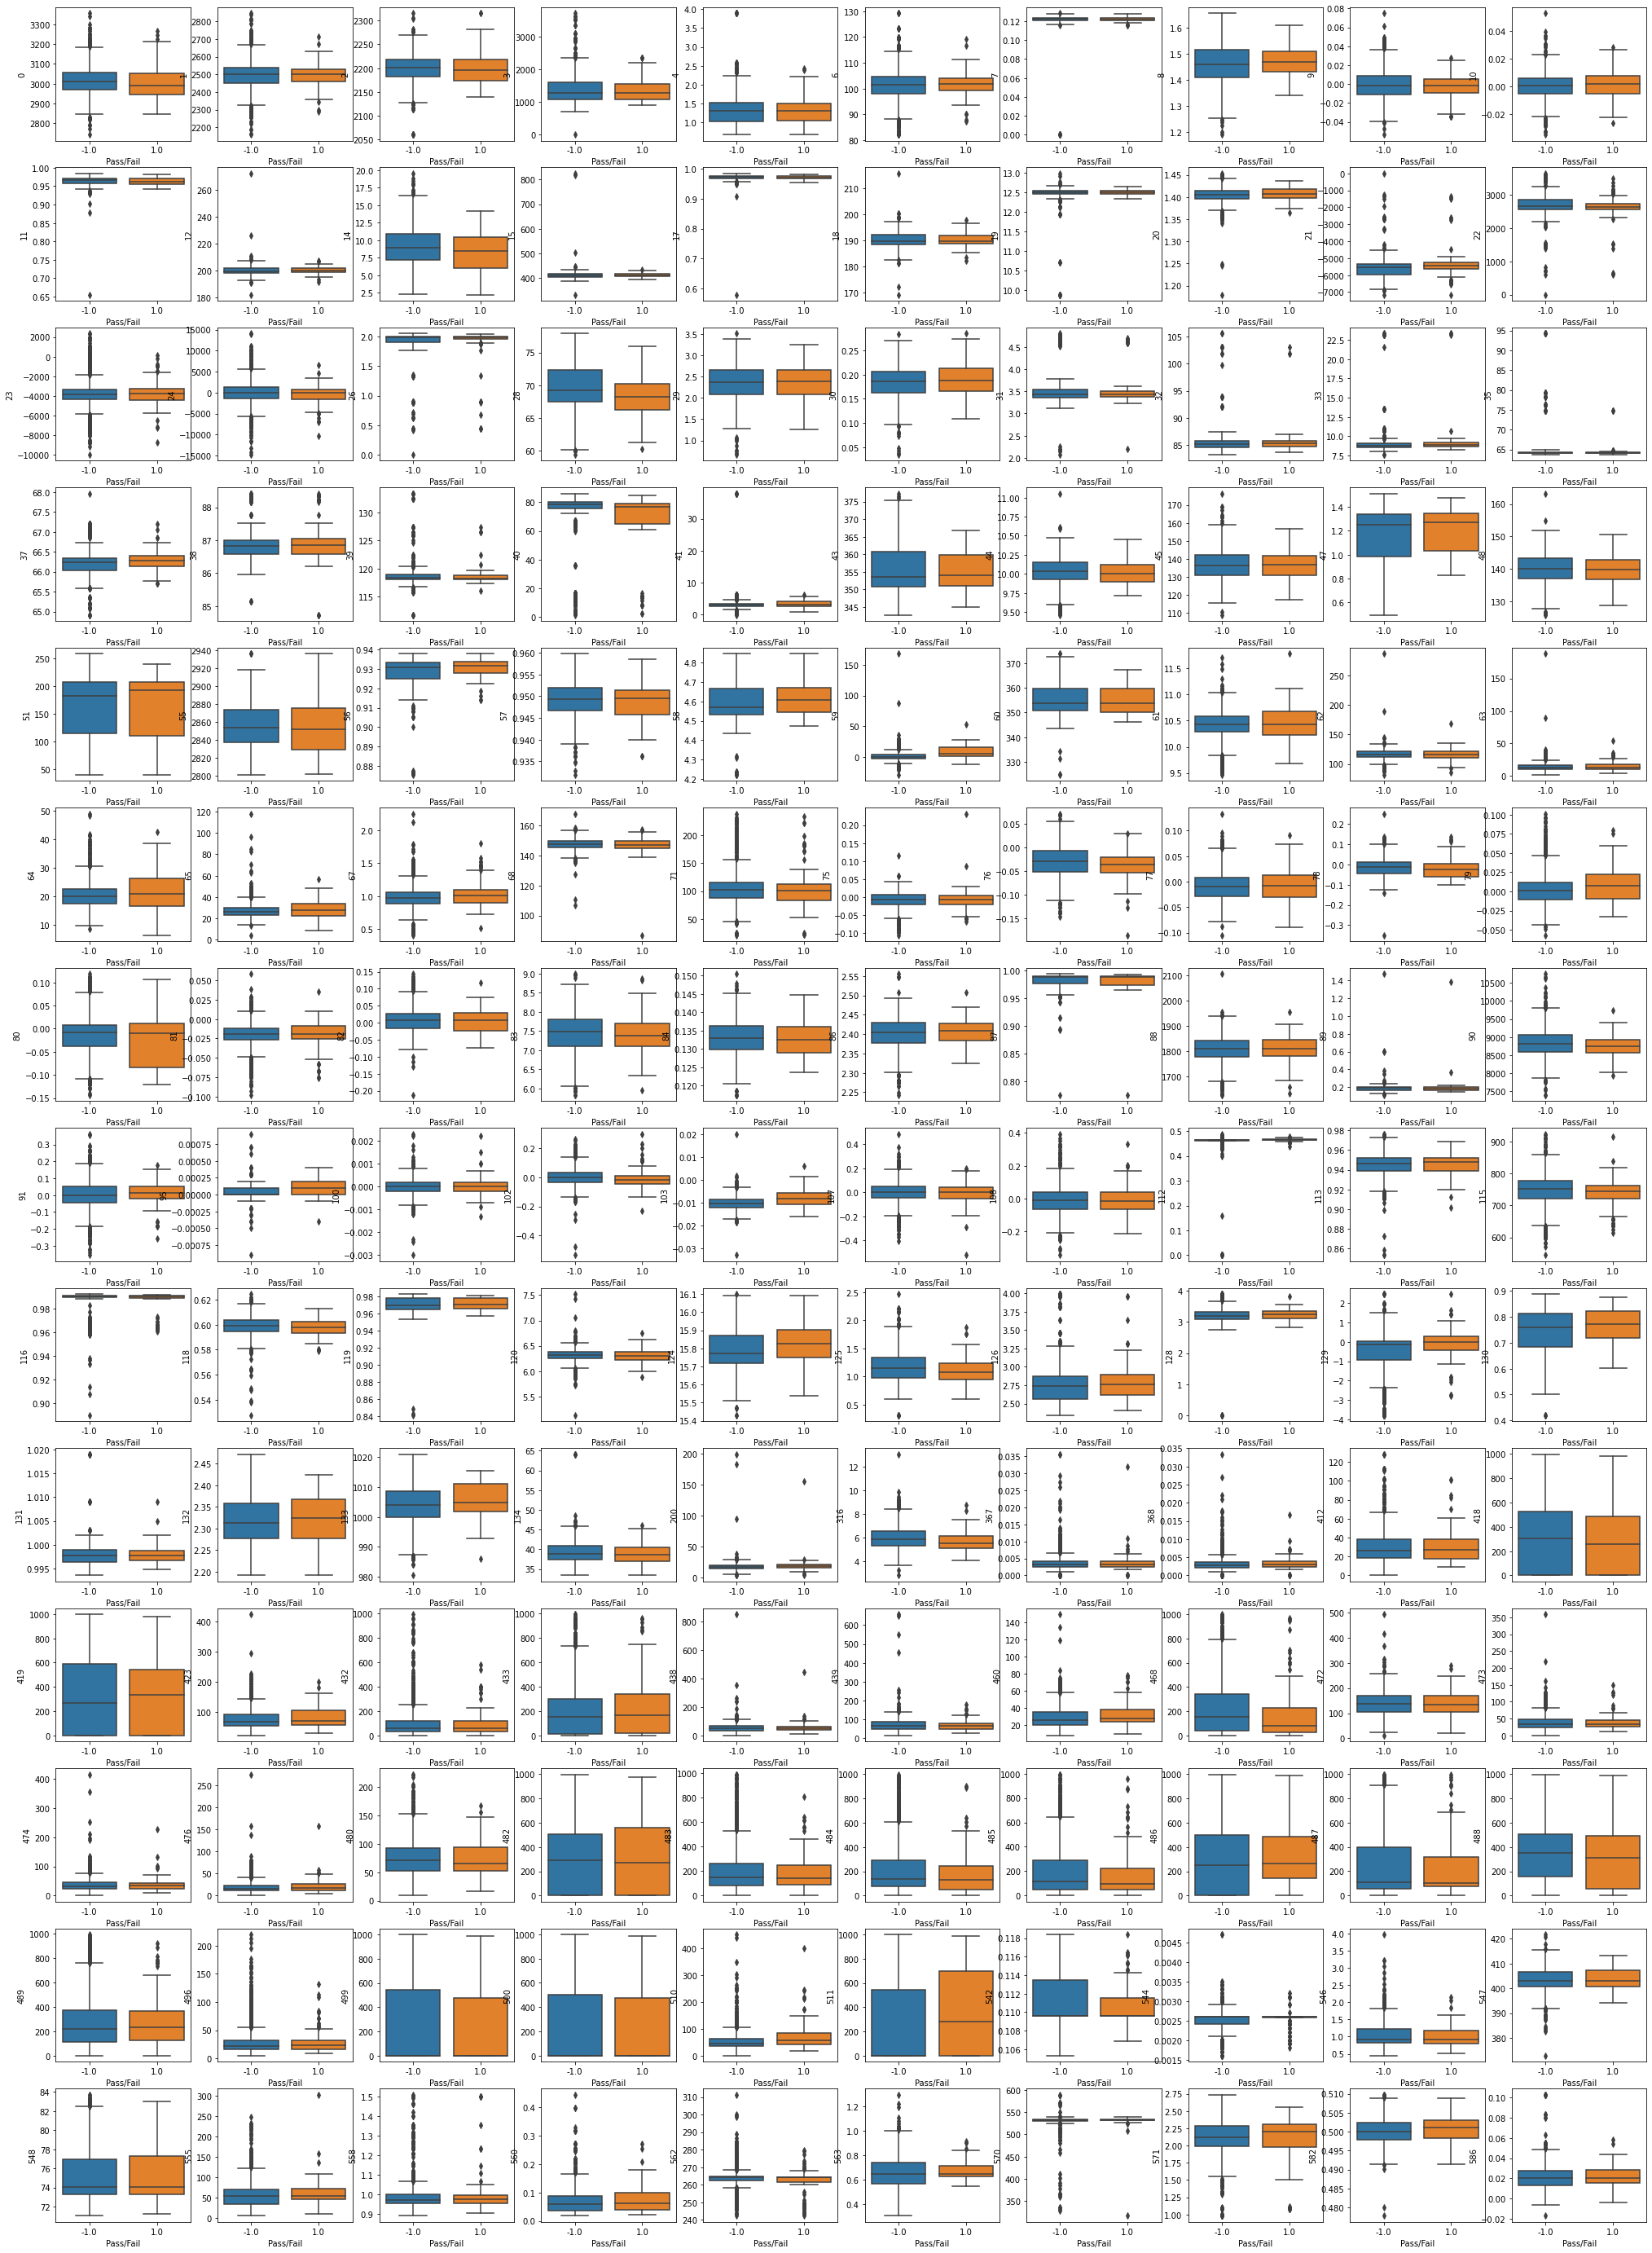

In [39]:
fig, ax = plt.subplots(14, 10, figsize = (35,50))
col = 0
for r in range(14):
    for c in range(10):
        sns.boxplot(x = 'Pass/Fail', y = data_reduced.columns[col], data = data_reduced, ax = ax[r][c])
        col += 1

### Although handling outliers for features which has extreme values, still outliers are present and it is fine. Replacing all outliers with median value might impact the output as almost all the columns have outliers

In [40]:
data_reduced.shape

(1567, 142)

### Split into input and output

In [41]:
data_reduced.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...     558     560      562     563       570     571  \
0  0.0162 -0.0034  ...  1.0344  0.1039  264.272  0.6510  533.8500  2.1113   
1 -0.0005 -0.0148  ...  0.9634  0.0375  264.272  0.6510  535.0164  2.4335   
2  0.0041  0.0013  ...  1.5021  0.1233  267.064  0.9032  535.0245  2.0293   
3 -0.0124 -0.0033  ...  1.1613  0.2710  268.228  0.6511  530.5682  2.0253   
4 -0.0031 -0.0072  ...  0.9778  0.0461  264.272  0.6510  532.0155  2.0275   

      582     586       589  Pass/Fail  
0  0.5005  0.0205   71.9005       -1.0  
1  0.5019  0.0096  208.2045       -1.0  
2  0.4958  0.0584   82.8602        1.0  
3  0.4990  0.0202   73.8432       -1.0  
4  0.4800  0.0202   73.8432       -1.0  

[5 rows x 142 columns]

In [42]:
x = data_reduced.drop(['Pass/Fail'], axis = 1)
y = data_reduced['Pass/Fail']

### Split into train and test

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Test if train and test have same characteristics

h0 = distribution is same    
h1 = distribution is not same  

In [44]:
x_train_mean = np.array(np.mean(x_train))
x_test_mean = np.array(np.mean(x_test))
x_mean = np.array(np.mean(x))

In [45]:
ttest,p1 = stats.ttest_ind(x_train_mean,x_mean)
print("p-testue",p1)
ttest,p2 = stats.ttest_ind(x_test_mean,x_mean)
print("p-testue",p2)

p-testue 0.998786653356853
p-testue 0.9971830251413131


In [46]:
alpha = 0.05
if p1.mean() < alpha and p2.mean() < alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

fail to reject null hypothesis


### since p > 0.05, fail to reject null hypothesis, Hence the distribution is same 

In [47]:
x_test.to_excel('input.xlsx', index=False)
y_test.to_excel('output.xlsx', index=False)

In [48]:
y.value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

### -1.0(pass) testue is dominating with 1463 testes where 1.0(Fail) testue has only 104 testues. Hence there are 2 possibilities

1. Up sampling
2. Down sampling

#### By down sampling we might loose some information and hence we can try first with up sampling

In [49]:
sm = SMOTE(sampling_strategy=1, random_state=1, k_neighbors=3)

In [50]:
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [51]:
print('x train without over sampling size is',x_train.shape)
print('y train without over sampling size is',y_train.shape)

print('x train with over sampling size is',x_train_sm.shape)
print('y train with over sampling size is',y_train_sm.shape)

x train without over sampling size is (1096, 141)
y train without over sampling size is (1096,)
x train with over sampling size is (2048, 141)
y train with over sampling size is (2048,)


In [52]:
print('Number of pass(-1.0) testue without over sampling is',y_train.value_counts()[-1.0])
print('Number of Fail(1.0) testue without over sampling is',y_train.value_counts()[1.0])

print('Number of pass(-1.0) testue with over sampling is',y_train_sm.value_counts()[-1.0])
print('Number of Fail(1.0) testue with over sampling is',y_train_sm.value_counts()[1.0])

Number of pass(-1.0) testue without over sampling is 1024
Number of Fail(1.0) testue without over sampling is 72
Number of pass(-1.0) testue with over sampling is 1024
Number of Fail(1.0) testue with over sampling is 1024


### Now the number of pass and fail is same 1024

### PCA

In [53]:
x_train_pca = zscore(x_train)
x_test_pca = zscore(x_test)
pca = PCA(n_components=50)
pca.fit(x_train_pca)
x_train_pca = pca.transform(x_train_pca)
x_test_pca = pca.transform(x_test_pca)
y_train_pca = y_train
y_test_pca = y_train
y_test_pca = y_test

In [54]:
# xscaled = zscore(x)
# pca = PCA(n_components=100)
# pca.fit(xscaled)
# xscaled_tranform = pca.transform(xscaled)

In [55]:
# x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(xscaled_tranform, y, test_size = 0.2, random_state = 1)

In [56]:
# x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_train_pca, y_train_pca, test_size = 0.1, random_state = 1)

In [57]:
sm = SMOTE(sampling_strategy=1, random_state=1, k_neighbors=3)

In [58]:
x_train_sm_pca, y_train_sm_pca = sm.fit_sample(x_train_pca, y_train_pca)

In [59]:
print('x train without over sampling size is',x_train_pca.shape)
print('y train without over sampling size is',y_train_pca.shape)

print('x train with over sampling size is',x_train_sm_pca.shape)
print('y train with over sampling size is',y_train_sm_pca.shape)

x train without over sampling size is (1096, 50)
y train without over sampling size is (1096,)
x train with over sampling size is (2048, 50)
y train with over sampling size is (2048,)


In [60]:
print('Number of pass(-1.0) testue without over sampling is',y_train_pca.value_counts()[-1.0])
print('Number of Fail(1.0) testue without over sampling is',y_train_pca.value_counts()[1.0])

print('Number of pass(-1.0) testue with over sampling is',y_train_sm_pca.value_counts()[-1.0])
print('Number of Fail(1.0) testue with over sampling is',y_train_sm_pca.value_counts()[1.0])

Number of pass(-1.0) testue without over sampling is 1024
Number of Fail(1.0) testue without over sampling is 72
Number of pass(-1.0) testue with over sampling is 1024
Number of Fail(1.0) testue with over sampling is 1024


### Lets start with Logistic Regression

#### Normal input

In [61]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
log_reg_score = log_reg.score(x_test, y_test)
print('Model score is',log_reg_score)

Model score is 0.9256900212314225


In [62]:
log_reg_cm = confusion_matrix(y_pred, y_test)
tp1, fn1, fp1, tn1 = log_reg_cm[0][0], log_reg_cm[0][1], log_reg_cm[1][0], log_reg_cm[1][1]
print('True positive count is',tp1)
print('False negative count is',fn1)
print('False positive count is',fp1)
print('True negative count is',tn1)

True positive count is 432
False negative count is 28
False positive count is 7
True negative count is 4


### K Fold CV 

In [63]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg, x_train, y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 91.332% (1.041%)


In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        -1.0       0.98      0.94      0.96       460
         1.0       0.12      0.36      0.19        11

    accuracy                           0.93       471
   macro avg       0.55      0.65      0.57       471
weighted avg       0.96      0.93      0.94       471



### LOOCV

In [65]:
# loocv = LeaveOneOut()
# results = cross_val_score(log_reg, x_train, y_train, cv=loocv)
# print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

This took a lot of time since there are several columns, hence not performed

#### Out of 32 Fail testues, only 3 has been identified as Fail without up sampling, whereas after up sampling 15 has been identified as Fail. But this affects in identifying the Pass

#### PCA

In [66]:
log_reg_pca = LogisticRegression(solver='liblinear')
log_reg_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = log_reg_pca.predict(x_test_pca)
log_reg_pca_score = log_reg_pca.score(x_test_pca, y_test_pca)
print('Model score is',log_reg_pca_score)

Model score is 0.9299363057324841


In [67]:
log_reg_pca_cm = confusion_matrix(y_pred_pca, y_test_pca)
tp2, fn2, fp2, tn2 = log_reg_pca_cm[0][0], log_reg_pca_cm[0][1], log_reg_pca_cm[1][0], log_reg_pca_cm[1][1]
print('True positive count is',tp2)
print('False negative count is',fn2)
print('False positive count is',fp2)
print('True negative count is',tn2)

True positive count is 437
False negative count is 31
False positive count is 2
True negative count is 1


### K Fold CV

In [68]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg_pca, x_train_pca, y_train_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 92.427% (0.799%)


In [69]:
print(classification_report(y_pred_pca, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96       468
         1.0       0.03      0.33      0.06         3

    accuracy                           0.93       471
   macro avg       0.51      0.63      0.51       471
weighted avg       0.99      0.93      0.96       471



#### Over sampled

In [70]:
log_reg_sm = LogisticRegression(solver='liblinear')
log_reg_sm.fit(x_train_sm, y_train_sm)
y_pred_sm = log_reg_sm.predict(x_test)
log_reg_sm_score = log_reg_sm.score(x_test, y_test)
print('Model score is',log_reg_sm_score)

Model score is 0.7855626326963907


In [71]:
log_reg_sm_cm = confusion_matrix(y_pred_sm, y_test)
tp3, fn3, fp3, tn3 = log_reg_sm_cm[0][0], log_reg_sm_cm[0][1], log_reg_sm_cm[1][0], log_reg_sm_cm[1][1]
print('True positive count is',tp3)
print('False negative count is',fn3)
print('False positive count is',fp3)
print('True negative count is',tn3)

True positive count is 355
False negative count is 17
False positive count is 84
True negative count is 15


### K Fold CV

In [72]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg_sm, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 79.492% (3.881%)


In [73]:
print(classification_report(y_pred_sm, y_test))

              precision    recall  f1-score   support

        -1.0       0.81      0.95      0.88       372
         1.0       0.47      0.15      0.23        99

    accuracy                           0.79       471
   macro avg       0.64      0.55      0.55       471
weighted avg       0.74      0.79      0.74       471



#### PCA for Over sampled

In [74]:
log_reg_sm_pca = LogisticRegression(solver='liblinear')
log_reg_sm_pca.fit(x_train_sm_pca, y_train_sm_pca)
y_pred_sm_pca = log_reg_sm_pca.predict(x_test_pca)
log_reg_sm_pca_score = log_reg_sm_pca.score(x_test_pca, y_test_pca)
print('Model score is',log_reg_sm_pca_score)

Model score is 0.7112526539278131


In [75]:
log_reg_sm_pca_cm = confusion_matrix(y_pred_sm_pca, y_test_pca)
tp4, fn4, fp4, tn4 = log_reg_sm_pca_cm[0][0], log_reg_sm_pca_cm[0][1], log_reg_sm_pca_cm[1][0], log_reg_sm_pca_cm[1][1]
print('True positive count is',tp4)
print('False negative count is',fn4)
print('False positive count is',fp4)
print('True negative count is',tn4)

True positive count is 322
False negative count is 19
False positive count is 117
True negative count is 13


### K Fold CV

In [76]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg_sm_pca, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 67.868% (4.586%)


In [77]:
print(classification_report(y_pred_sm_pca, y_test))

              precision    recall  f1-score   support

        -1.0       0.73      0.94      0.83       341
         1.0       0.41      0.10      0.16       130

    accuracy                           0.71       471
   macro avg       0.57      0.52      0.49       471
weighted avg       0.64      0.71      0.64       471



### Tuning

In [78]:
param_grid = {'solver' : ('lbfgs', 'liblinear', 'sag', 'saga'),
             'penalty' : ('l1', 'l2'),
             'C' : (0.1, 1)}

#### Normal data with tuning

In [79]:
log_reg_gs = GridSearchCV(log_reg, param_grid = param_grid, cv = 5)
log_reg_gs.fit(x_train, y_train)
print(log_reg_gs.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [80]:
y_pred_gs = log_reg_gs.predict(x_test)
log_reg_gs_score = log_reg_gs.score(x_test, y_test)
print('Model score is',log_reg_gs_score)

Model score is 0.9320594479830149


In [81]:
log_reg_gs_cm = confusion_matrix(y_pred_gs, y_test)
tp5, fn5, fp5, tn5 = log_reg_gs_cm[0][0], log_reg_gs_cm[0][1], log_reg_gs_cm[1][0], log_reg_gs_cm[1][1]
print('True positive count is',tp5)
print('False negative count is',fn5)
print('False positive count is',fp5)
print('True negative count is',tn5)

True positive count is 439
False negative count is 32
False positive count is 0
True negative count is 0


### K fold CV

In [82]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg_gs, x_train, y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.157% (0.646%)


In [83]:
print(classification_report(y_pred_gs, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96       471
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       1.00      0.93      0.96       471



#### PCA with tuning

In [84]:
log_reg_pca_gs = GridSearchCV(log_reg_pca, param_grid = param_grid, cv = 5)
log_reg_pca_gs.fit(x_train_pca, y_train_pca)
print(log_reg_pca_gs.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [85]:
y_pred_pca_gs = log_reg_pca_gs.predict(x_test_pca)
log_reg_pca_gs_score = log_reg_pca_gs.score(x_test_pca, y_test_pca)
print('Model score is',log_reg_pca_gs_score)

Model score is 0.9320594479830149


In [86]:
log_reg_pca_gs_cm = confusion_matrix(y_pred_pca_gs, y_test_pca)
tp6, fn6, fp6, tn6 = log_reg_pca_gs_cm[0][0], log_reg_pca_gs_cm[0][1], log_reg_pca_gs_cm[1][0], log_reg_pca_gs_cm[1][1]
print('True positive count is',tp6)
print('False negative count is',fn6)
print('False positive count is',fp6)
print('True negative count is',tn6)

True positive count is 439
False negative count is 32
False positive count is 0
True negative count is 0


### K Fold CV

In [87]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg_pca_gs, x_train_pca, y_train_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.248% (1.057%)


In [88]:
print(classification_report(y_pred_pca_gs, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96       471
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       1.00      0.93      0.96       471



#### Over sampled with tuning

In [89]:
log_reg_sm_gs = GridSearchCV(log_reg_sm, param_grid = param_grid, cv = 5)
log_reg_sm_gs.fit(x_train_sm, y_train_sm)
print(log_reg_sm_gs.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [90]:
y_pred_sm_gs = log_reg_sm_gs.predict(x_test)
log_reg_sm_gs_score = log_reg_sm_gs.score(x_test, y_test)
print('Model score is',log_reg_sm_gs_score)

Model score is 0.7983014861995754


In [91]:
log_reg_sm_gs_cm = confusion_matrix(y_pred_sm_gs, y_test)
tp7, fn7, fp7, tn7 = log_reg_sm_gs_cm[0][0], log_reg_sm_gs_cm[0][1], log_reg_sm_gs_cm[1][0], log_reg_sm_gs_cm[1][1]
print('True positive count is',tp7)
print('False negative count is',fn7)
print('False positive count is',fp7)
print('True negative count is',tn7)

True positive count is 362
False negative count is 18
False positive count is 77
True negative count is 14


### K Fold CV

In [215]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg_sm_gs, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 81.984% (3.111%)


In [93]:
print(classification_report(y_pred_sm_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.82      0.95      0.88       380
         1.0       0.44      0.15      0.23        91

    accuracy                           0.80       471
   macro avg       0.63      0.55      0.56       471
weighted avg       0.75      0.80      0.76       471



### PCA oversampled with tuning

In [94]:
log_reg_sm_pca_gs = GridSearchCV(log_reg_sm_pca, param_grid = param_grid, cv = 5)
log_reg_sm_pca_gs.fit(x_train_sm_pca, y_train_sm_pca)
print(log_reg_pca_gs.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [95]:
y_pred_sm_pca_gs = log_reg_sm_pca_gs.predict(x_test_pca)
log_reg_sm_pca_gs_score = log_reg_sm_pca_gs.score(x_test_pca, y_test_pca)
print('Model score is',log_reg_sm_pca_gs_score)

Model score is 0.7112526539278131


In [96]:
log_reg_sm_pca_gs_cm = confusion_matrix(y_pred_sm_pca_gs, y_test_pca)
tp8, fn8, fp8, tn8 = log_reg_sm_pca_gs_cm[0][0], log_reg_sm_pca_gs_cm[0][1], log_reg_sm_pca_gs_cm[1][0], log_reg_sm_pca_gs_cm[1][1]
print('True positive count is',tp8)
print('False negative count is',fn8)
print('False positive count is',fp8)
print('True negative count is',tn8)

True positive count is 322
False negative count is 19
False positive count is 117
True negative count is 13


### K Fold CV

In [216]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(log_reg_sm_pca_gs, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 68.210% (4.483%)


In [97]:
print(classification_report(y_pred_sm_pca_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.73      0.94      0.83       341
         1.0       0.41      0.10      0.16       130

    accuracy                           0.71       471
   macro avg       0.57      0.52      0.49       471
weighted avg       0.64      0.71      0.64       471



#### Declare the Dataframe with summarized data

In [98]:
model_perf = pd.DataFrame(columns = ['Model Name', 'up sampled (yes/no)', 'TP Count', 'FP Count', 'TN Count', 'FN Count','Accuracy Score','Recall','Precision'])

In [99]:
model_perf.loc[0] = ['Log Regression(without tuning)','no', tp1, fp1, tn1, fn1, log_reg_score, recall_score(y_pred, y_test), precision_score(y_pred, y_test)]
model_perf.loc[1] = ['Log Regression - PCA(without tuning)','yes', tp2, fp2, tn2, fn2, log_reg_pca_score, recall_score(y_pred_pca, y_test), precision_score(y_pred_pca, y_test)]
model_perf.loc[2] = ['Log Regression(without tuning)','no', tp3, fp3, tn3, fn3, log_reg_sm_score, recall_score(y_pred_sm, y_test), precision_score(y_pred_sm, y_test)]
model_perf.loc[3] = ['Log Regression - PCA(without tuning)','yes', tp4, fp4, tn4, fn4, log_reg_sm_pca_score, recall_score(y_pred_sm_pca, y_test), precision_score(y_pred_sm_pca, y_test)]
model_perf.loc[4] = ['Log Regression(with tuning)','no', tp5, fp5, tn5, fn5, log_reg_gs_score, recall_score(y_pred_gs, y_test), precision_score(y_pred_gs, y_test)]
model_perf.loc[5] = ['Log Regression - PCA(with tuning)','no', tp6, fp6, tn6, fn6, log_reg_pca_gs_score, recall_score(y_pred_pca_gs, y_test), precision_score(y_pred_pca_gs, y_test)]
model_perf.loc[6] = ['Log Regression(with tuning)','yes', tp7, fp7, tn7, fn7, log_reg_sm_gs_score, recall_score(y_pred_sm_gs, y_test), precision_score(y_pred_sm_gs, y_test)]
model_perf.loc[7] = ['Log Regression - PCA(with tuning)','yes', tp8, fp8, tn8, fn8, log_reg_sm_pca_gs_score, recall_score(y_pred_sm_pca_gs, y_test), precision_score(y_pred_sm_pca_gs, y_test)]
model_perf

Model Name up sampled (yes/no) TP Count FP Count  \
0        Log Regression(without tuning)                  no      432        7   
1  Log Regression - PCA(without tuning)                 yes      437        2   
2        Log Regression(without tuning)                  no      355       84   
3  Log Regression - PCA(without tuning)                 yes      322      117   
4           Log Regression(with tuning)                  no      439        0   
5     Log Regression - PCA(with tuning)                  no      439        0   
6           Log Regression(with tuning)                 yes      362       77   
7     Log Regression - PCA(with tuning)                 yes      322      117   

  TN Count FN Count  Accuracy Score    Recall  Precision  
0        4       28        0.925690  0.363636    0.12500  
1        1       31        0.929936  0.333333    0.03125  
2       15       17        0.785563  0.151515    0.46875  
3       13       19        0.711253  0.100000    0.40625  
4        0       32        0.932059  0.000000    0.00000  
5        0       32        0.932059  0.000000    0.00000  
6       14       18        0.798301  0.153846    0.43750  
7       13       19        0.711253  0.100000    0.40625

### index number 0, 1, 4, 5 will not be useful as it is not predicting Fail cases that much. Also index 3 and 7 cannot be used as the accuracy is too low and many False positive predictions and it is expected to reduce when reducing dimensions since we are loosing the features

### index 2 and 6 yields best result as it predicts both Fail and Pass cases although accuracy drops from 93 to 80. Since tuned, the best case for Logistic Regression is without using PCA and oversampled Using SMOTE

## KNN

### Normal

In [100]:
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
knn_score = log_reg.score(x_test, y_test)
print('Model score is',knn_score)

Model score is 0.9256900212314225


In [101]:
knn_cm = confusion_matrix(y_pred, y_test)
tp1, fn1, fp1, tn1 = knn_cm[0][0], knn_cm[0][1], knn_cm[1][0], knn_cm[1][1]
print('True positive count is',tp1)
print('False negative count is',fn1)
print('False positive count is',fp1)
print('True negative count is',tn1)

True positive count is 432
False negative count is 28
False positive count is 7
True negative count is 4


### K Fold CV

In [102]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn, x_train, y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.157% (1.289%)


In [103]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        -1.0       0.98      0.94      0.96       460
         1.0       0.12      0.36      0.19        11

    accuracy                           0.93       471
   macro avg       0.55      0.65      0.57       471
weighted avg       0.96      0.93      0.94       471



### PCA

In [104]:
knn_pca = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)
knn_pca_score = knn_pca.score(x_test_pca, y_test_pca)
print('Model score is',knn_pca_score)

Model score is 0.9320594479830149


In [105]:
knn_pca_cm = confusion_matrix(y_pred_pca, y_test_pca)
tp2, fn2, fp2, tn2 = knn_pca_cm[0][0], knn_pca_cm[0][1], knn_pca_cm[1][0], knn_pca_cm[1][1]
print('True positive count is',tp2)
print('False negative count is',fn2)
print('False positive count is',fp2)
print('True negative count is',tn2)

True positive count is 439
False negative count is 32
False positive count is 0
True negative count is 0


### K Fold CV

In [106]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn_pca, x_train_pca, y_train_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.248% (0.931%)


In [107]:
print(classification_report(y_pred_pca, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96       471
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       1.00      0.93      0.96       471



### Over sampled

In [108]:
knn_sm = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn_sm.fit(x_train_sm, y_train_sm)
y_pred_sm = knn_sm.predict(x_test)
knn_sm_score = knn_sm.score(x_test, y_test)
print('Model score is',knn_sm_score)

Model score is 0.5711252653927813


In [109]:
knn_sm_cm = confusion_matrix(y_pred_sm, y_test)
tp3, fn3, fp3, tn3 = knn_sm_cm[0][0], knn_sm_cm[0][1], knn_sm_cm[1][0], knn_sm_cm[1][1]
print('True positive count is',tp3)
print('False negative count is',fn3)
print('False positive count is',fp3)
print('True negative count is',tn3)

True positive count is 255
False negative count is 18
False positive count is 184
True negative count is 14


### K Fold CV

In [110]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn_sm, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 74.634% (22.078%)


In [111]:
print(classification_report(y_pred_sm, y_test))

              precision    recall  f1-score   support

        -1.0       0.58      0.93      0.72       273
         1.0       0.44      0.07      0.12       198

    accuracy                           0.57       471
   macro avg       0.51      0.50      0.42       471
weighted avg       0.52      0.57      0.47       471



### PCA with oversampled

In [112]:
knn_sm_pca = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn_sm_pca.fit(x_train_sm_pca, y_train_sm_pca)
y_pred_sm_pca = knn_sm_pca.predict(x_test_pca)
knn_sm_pca_score = knn_sm_pca.score(x_test_pca, y_test_pca)
print('Model score is',knn_sm_pca_score)

Model score is 0.5371549893842887


In [113]:
knn_sm_pca_cm = confusion_matrix(y_pred_sm_pca, y_test)
tp4, fn4, fp4, tn4 = knn_sm_pca_cm[0][0], knn_sm_pca_cm[0][1], knn_sm_pca_cm[1][0], knn_sm_pca_cm[1][1]
print('True positive count is',tp4)
print('False negative count is',fn4)
print('False positive count is',fp4)
print('True negative count is',tn4)

True positive count is 229
False negative count is 8
False positive count is 210
True negative count is 24


### K Fold CV

In [114]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn_sm_pca, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 73.122% (23.180%)


In [115]:
print(classification_report(y_pred_sm_pca, y_test))

              precision    recall  f1-score   support

        -1.0       0.52      0.97      0.68       237
         1.0       0.75      0.10      0.18       234

    accuracy                           0.54       471
   macro avg       0.64      0.53      0.43       471
weighted avg       0.64      0.54      0.43       471



## Tuning

In [116]:
param_grid = {'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'weights' : ('uniform', 'distance'),
             'n_neighbors' : range(1,10)}

### Normal data with tuning

In [117]:
knn_gs = GridSearchCV(knn, param_grid = param_grid, cv = 10)
knn_gs.fit(x_train, y_train)
print(knn_gs.best_params_)

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}


In [118]:
y_pred_gs = knn_gs.predict(x_test)
knn_gs_score = knn_gs.score(x_test, y_test)
print('Model score is',knn_gs_score)

Model score is 0.9320594479830149


In [119]:
knn_gs_cm = confusion_matrix(y_pred_gs, y_test)
tp5, fn5, fp5, tn5 = knn_gs_cm[0][0], knn_gs_cm[0][1], knn_gs_cm[1][0], knn_gs_cm[1][1]
print('True positive count is',tp5)
print('False negative count is',fn5)
print('False positive count is',fp5)
print('True negative count is',tn5)

True positive count is 439
False negative count is 32
False positive count is 0
True negative count is 0


### K Fold CV

In [120]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn_gs, x_train, y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.340% (1.176%)


In [121]:
print(classification_report(y_pred_gs, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96       471
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       1.00      0.93      0.96       471



### PCA with tuning

In [122]:
knn_pca_gs = GridSearchCV(knn_pca, param_grid = param_grid, cv = 10)
knn_pca_gs.fit(x_train_pca, y_train_pca)
print(knn_pca_gs.best_params_)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}


In [123]:
y_pred_pca_gs = knn_pca_gs.predict(x_test_pca)
knn_pca_gs_score = knn_pca_gs.score(x_test_pca, y_test_pca)
print('Model score is',knn_pca_gs_score)

Model score is 0.9320594479830149


In [124]:
knn_pca_gs_cm = confusion_matrix(y_pred_pca_gs, y_test)
tp6, fn6, fp6, tn6 = knn_pca_gs_cm[0][0], knn_pca_gs_cm[0][1], knn_pca_gs_cm[1][0], knn_pca_gs_cm[1][1]
print('True positive count is',tp6)
print('False negative count is',fn6)
print('False positive count is',fp6)
print('True negative count is',tn6)

True positive count is 439
False negative count is 32
False positive count is 0
True negative count is 0


### K Fold CV

In [125]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn_pca_gs, x_train_pca, y_train_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.431% (1.102%)


In [126]:
print(classification_report(y_pred_pca_gs, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96       471
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       1.00      0.93      0.96       471



### Oversampled data with tuning

In [127]:
knn_sm_gs = GridSearchCV(knn_sm, param_grid = param_grid, cv = 10)
knn_sm_gs.fit(x_train_sm, y_train_sm)
print(knn_sm_gs.best_params_)

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


In [128]:
y_pred_sm_gs = knn_sm_gs.predict(x_test)
knn_sm_gs_score = knn_sm_gs.score(x_test, y_test)
print('Model score is',knn_sm_gs_score)

Model score is 0.7579617834394905


In [129]:
knn_sm_gs_cm = confusion_matrix(y_pred_sm_gs, y_test)
tp7, fn7, fp7, tn7 = knn_sm_gs_cm[0][0], knn_sm_gs_cm[0][1], knn_sm_gs_cm[1][0], knn_sm_gs_cm[1][1]
print('True positive count is',tp7)
print('False negative count is',fn7)
print('False positive count is',fp7)
print('True negative count is',tn7)

True positive count is 349
False negative count is 24
False positive count is 90
True negative count is 8


### K Fold CV

In [130]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn_sm_gs, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 86.683% (11.140%)


In [131]:
print(classification_report(y_pred_sm_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.79      0.94      0.86       373
         1.0       0.25      0.08      0.12        98

    accuracy                           0.76       471
   macro avg       0.52      0.51      0.49       471
weighted avg       0.68      0.76      0.71       471



### PCA with oversampled tuning

In [132]:
knn_sm_pca_gs = GridSearchCV(knn_sm_pca, param_grid = param_grid, cv = 10)
knn_sm_pca_gs.fit(x_train_sm_pca, y_train_sm_pca)
print(knn_sm_pca_gs.best_params_)

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


In [133]:
y_pred_sm_pca_gs = knn_sm_pca_gs.predict(x_test_pca)
knn_sm_pca_gs_score = knn_sm_pca_gs.score(x_test_pca, y_test_pca)
print('Model score is',knn_sm_pca_gs_score)

Model score is 0.7473460721868365


In [134]:
knn_sm_pca_gs_cm = confusion_matrix(y_pred_sm_pca_gs, y_test)
tp8, fn8, fp8, tn8 = knn_sm_pca_gs_cm[0][0], knn_sm_pca_gs_cm[0][1], knn_sm_pca_gs_cm[1][0], knn_sm_pca_gs_cm[1][1]
print('True positive count is',tp8)
print('False negative count is',fn8)
print('False positive count is',fp8)
print('True negative count is',tn8)

True positive count is 337
False negative count is 17
False positive count is 102
True negative count is 15


### K Fold CV

In [135]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(knn_sm_pca_gs, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 86.634% (12.116%)


In [136]:
print(classification_report(y_pred_sm_pca_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.77      0.95      0.85       354
         1.0       0.47      0.13      0.20       117

    accuracy                           0.75       471
   macro avg       0.62      0.54      0.53       471
weighted avg       0.69      0.75      0.69       471



### KNN summarization

In [137]:
model_perf.loc[8] = ['KNN(without tuning)','no', tp1, fp1, tn1, fn1, knn_score,recall_score(y_pred, y_test), precision_score(y_pred, y_test)]
model_perf.loc[9] = ['KNN - PCA(without tuning)','no', tp2, fp2, tn2, fn2, knn_pca_score,recall_score(y_pred_pca, y_test), precision_score(y_pred_pca, y_test)]
model_perf.loc[10] = ['KNN(without tuning)','yes', tp3, fp3, tn3, fn3, knn_sm_score,recall_score(y_pred_sm, y_test), precision_score(y_pred_sm, y_test)]
model_perf.loc[11] = ['KNN - PCA(without tuning)','yes', tp4, fp4, tn4, fn4, knn_sm_pca_score,recall_score(y_pred_sm_pca, y_test), precision_score(y_pred_sm_pca, y_test)]
model_perf.loc[12] = ['KNN(with tuning)','no', tp5, fp5, tn5, fn5, knn_gs_score,recall_score(y_pred_gs, y_test), precision_score(y_pred_gs, y_test)]
model_perf.loc[13] = ['KNN - PCA(with tuning)','no', tp6, fp6, tn6, fn6, knn_pca_gs_score,recall_score(y_pred_pca_gs, y_test), precision_score(y_pred_pca_gs, y_test)]
model_perf.loc[14] = ['KNN(with tuning)','yes', tp7, fp7, tn7, fn7, knn_sm_gs_score,recall_score(y_pred_sm_gs, y_test), precision_score(y_pred_sm_gs, y_test)]
model_perf.loc[15] = ['KNN - PCA(with tuning)','yes', tp8, fp8, tn8, fn8, knn_sm_pca_gs_score,recall_score(y_pred_sm_pca_gs, y_test), precision_score(y_pred_sm_pca_gs, y_test)]
model_perf

Model Name up sampled (yes/no) TP Count  \
0         Log Regression(without tuning)                  no      432   
1   Log Regression - PCA(without tuning)                 yes      437   
2         Log Regression(without tuning)                  no      355   
3   Log Regression - PCA(without tuning)                 yes      322   
4            Log Regression(with tuning)                  no      439   
5      Log Regression - PCA(with tuning)                  no      439   
6            Log Regression(with tuning)                 yes      362   
7      Log Regression - PCA(with tuning)                 yes      322   
8                    KNN(without tuning)                  no      432   
9              KNN - PCA(without tuning)                  no      439   
10                   KNN(without tuning)                 yes      255   
11             KNN - PCA(without tuning)                 yes      229   
12                      KNN(with tuning)                  no      439   
13                KNN - PCA(with tuning)                  no      439   
14                      KNN(with tuning)                 yes      349   
15                KNN - PCA(with tuning)                 yes      337   

   FP Count TN Count FN Count  Accuracy Score    Recall  Precision  
0         7        4       28        0.925690  0.363636    0.12500  
1         2        1       31        0.929936  0.333333    0.03125  
2        84       15       17        0.785563  0.151515    0.46875  
3       117       13       19        0.711253  0.100000    0.40625  
4         0        0       32        0.932059  0.000000    0.00000  
5         0        0       32        0.932059  0.000000    0.00000  
6        77       14       18        0.798301  0.153846    0.43750  
7       117       13       19        0.711253  0.100000    0.40625  
8         7        4       28        0.925690  0.363636    0.12500  
9         0        0       32        0.932059  0.000000    0.00000  
10      184       14       18        0.571125  0.070707    0.43750  
11      210       24        8        0.537155  0.102564    0.75000  
12        0        0       32        0.932059  0.000000    0.00000  
13        0        0       32        0.932059  0.000000    0.00000  
14       90        8       24        0.757962  0.081633    0.25000  
15      102       15       17        0.747346  0.128205    0.46875

### index number 8, 9, 12, 13 will not be useful as it is not predicting Fail cases that much. Also index 10, 11 and 15 cannot be used as the accuracy is too low and many False positive predictions and it is expected to reduce when reducing dimensions since we are loosing the features

### index 14 yields best result as it predicts both Fail and Pass cases although accuracy drops from 93 to 76. Since tuned, the best case for KNN is without using PCA and normal data with oversampling. but still not better than Logistic Regression

In [138]:
model_perf

Model Name up sampled (yes/no) TP Count  \
0         Log Regression(without tuning)                  no      432   
1   Log Regression - PCA(without tuning)                 yes      437   
2         Log Regression(without tuning)                  no      355   
3   Log Regression - PCA(without tuning)                 yes      322   
4            Log Regression(with tuning)                  no      439   
5      Log Regression - PCA(with tuning)                  no      439   
6            Log Regression(with tuning)                 yes      362   
7      Log Regression - PCA(with tuning)                 yes      322   
8                    KNN(without tuning)                  no      432   
9              KNN - PCA(without tuning)                  no      439   
10                   KNN(without tuning)                 yes      255   
11             KNN - PCA(without tuning)                 yes      229   
12                      KNN(with tuning)                  no      439   
13                KNN - PCA(with tuning)                  no      439   
14                      KNN(with tuning)                 yes      349   
15                KNN - PCA(with tuning)                 yes      337   

   FP Count TN Count FN Count  Accuracy Score    Recall  Precision  
0         7        4       28        0.925690  0.363636    0.12500  
1         2        1       31        0.929936  0.333333    0.03125  
2        84       15       17        0.785563  0.151515    0.46875  
3       117       13       19        0.711253  0.100000    0.40625  
4         0        0       32        0.932059  0.000000    0.00000  
5         0        0       32        0.932059  0.000000    0.00000  
6        77       14       18        0.798301  0.153846    0.43750  
7       117       13       19        0.711253  0.100000    0.40625  
8         7        4       28        0.925690  0.363636    0.12500  
9         0        0       32        0.932059  0.000000    0.00000  
10      184       14       18        0.571125  0.070707    0.43750  
11      210       24        8        0.537155  0.102564    0.75000  
12        0        0       32        0.932059  0.000000    0.00000  
13        0        0       32        0.932059  0.000000    0.00000  
14       90        8       24        0.757962  0.081633    0.25000  
15      102       15       17        0.747346  0.128205    0.46875

## It is very clear that only records which are up sampled have Fail predictions, so in the further models lets try only upsampled ones

### Over sampled data

In [139]:
nb_sm = GaussianNB()
nb_sm.fit(x_train_sm, y_train_sm)
y_pred_sm = nb_sm.predict(x_test)
nb_sm_score = nb_sm.score(x_test, y_test)
print('Model score is',nb_sm_score)

Model score is 0.70276008492569


In [140]:
nb_sm_cm = confusion_matrix(y_pred_sm, y_test)
tp3, fn3, fp3, tn3 = nb_sm_cm[0][0], nb_sm_cm[0][1], nb_sm_cm[1][0], nb_sm_cm[1][1]
print('True positive count is',tp3)
print('False negative count is',fn3)
print('False positive count is',fp3)
print('True negative count is',tn3)

True positive count is 320
False negative count is 21
False positive count is 119
True negative count is 11


### K Fold CV

In [141]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(nb_sm, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.043% (10.445%)


In [142]:
print(classification_report(y_pred_sm, y_test))

              precision    recall  f1-score   support

        -1.0       0.73      0.94      0.82       341
         1.0       0.34      0.08      0.14       130

    accuracy                           0.70       471
   macro avg       0.54      0.51      0.48       471
weighted avg       0.62      0.70      0.63       471



### PCA with oversampled data

In [143]:
nb_sm_pca = GaussianNB()
nb_sm_pca.fit(x_train_sm_pca, y_train_sm_pca)
y_pred_sm_pca = nb_sm_pca.predict(x_test_pca)
nb_sm_pca_score = nb_sm_pca.score(x_test_pca, y_test_pca)
print('Model score is',nb_sm_pca_score)

Model score is 0.613588110403397


In [144]:
nb_sm_pca_cm = confusion_matrix(y_pred_sm_pca, y_test)
tp4, fn4, fp4, tn4 = nb_sm_pca_cm[0][0], nb_sm_pca_cm[0][1], nb_sm_pca_cm[1][0], nb_sm_pca_cm[1][1]
print('True positive count is',tp4)
print('False negative count is',fn4)
print('False positive count is',fp4)
print('True negative count is',tn4)

True positive count is 278
False negative count is 21
False positive count is 161
True negative count is 11


### K Fold CV

In [145]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(nb_sm_pca, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 71.346% (7.417%)


In [146]:
print(classification_report(y_pred_sm_pca, y_test))

              precision    recall  f1-score   support

        -1.0       0.63      0.93      0.75       299
         1.0       0.34      0.06      0.11       172

    accuracy                           0.61       471
   macro avg       0.49      0.50      0.43       471
weighted avg       0.53      0.61      0.52       471



## Tuning

### Oversampled tuning

In [147]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [148]:
nb_sm_gs = GridSearchCV(nb_sm, param_grid = param_grid, cv = 10)
nb_sm_gs.fit(x_train_sm, y_train_sm)
print(nb_sm_gs.best_params_)

{'var_smoothing': 1.519911082952933e-09}


In [149]:
y_pred_sm_gs = nb_sm_gs.predict(x_test)
nb_sm_gs_score = nb_sm_gs.score(x_test, y_test)
print('Model score is',nb_sm_gs_score)

Model score is 0.6942675159235668


In [150]:
nb_sm_gs_cm = confusion_matrix(y_pred_sm_gs, y_test)
tp7, fn7, fp7, tn7 = nb_sm_gs_cm[0][0], nb_sm_gs_cm[0][1], nb_sm_gs_cm[1][0], nb_sm_gs_cm[1][1]
print('True positive count is',tp7)
print('False negative count is',fn7)
print('False positive count is',fp7)
print('True negative count is',tn7)

True positive count is 316
False negative count is 21
False positive count is 123
True negative count is 11


### K Fold CV

In [151]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(nb_sm_gs, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.043% (10.445%)


In [152]:
print(classification_report(y_pred_sm_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.72      0.94      0.81       337
         1.0       0.34      0.08      0.13       134

    accuracy                           0.69       471
   macro avg       0.53      0.51      0.47       471
weighted avg       0.61      0.69      0.62       471



## PCA oversampled with tuning

In [153]:
nb_sm_pca_gs = GridSearchCV(nb_sm_pca, param_grid = param_grid, cv = 10)
nb_sm_pca_gs.fit(x_train_sm_pca, y_train_sm_pca)
print(nb_sm_pca_gs.best_params_)

{'var_smoothing': 0.0001}


In [154]:
y_pred_sm_pca_gs = nb_sm_pca_gs.predict(x_test_pca)
nb_sm_pca_gs_score = nb_sm_pca_gs.score(x_test_pca, y_test_pca)
print('Model score is',nb_sm_pca_gs_score)

Model score is 0.613588110403397


In [155]:
nb_sm_pca_gs_cm = confusion_matrix(y_pred_sm_pca_gs, y_test)
tp8, fn8, fp8, tn8 = nb_sm_pca_gs_cm[0][0], nb_sm_pca_gs_cm[0][1], nb_sm_pca_gs_cm[1][0], nb_sm_pca_gs_cm[1][1]
print('True positive count is',tp8)
print('False negative count is',fn8)
print('False positive count is',fp8)
print('True negative count is',tn8)

True positive count is 278
False negative count is 21
False positive count is 161
True negative count is 11


### K Fold CV

In [156]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(nb_sm_pca_gs, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 70.566% (8.527%)


In [157]:
print(classification_report(y_pred_sm_pca_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.63      0.93      0.75       299
         1.0       0.34      0.06      0.11       172

    accuracy                           0.61       471
   macro avg       0.49      0.50      0.43       471
weighted avg       0.53      0.61      0.52       471



## NB Summarization

In [158]:
model_perf.loc[16] = ['NB(without tuning)','yes', tp3, fp3, tn3, fn3, nb_sm_score,recall_score(y_pred_sm, y_test), precision_score(y_pred_sm, y_test)]
model_perf.loc[17] = ['NB - PCA(without tuning)','yes', tp4, fp4, tn4, fn4, nb_sm_pca_score,recall_score(y_pred_sm_pca, y_test), precision_score(y_pred_sm_pca, y_test)]
model_perf.loc[18] = ['NB(with tuning)','yes', tp7, fp7, tn7, fn7, nb_sm_gs_score,recall_score(y_pred_sm_gs, y_test), precision_score(y_pred_sm_gs, y_test)]
model_perf.loc[19] = ['NB - PCA(with tuning)','yes', tp8, fp8, tn8, fn8, nb_sm_pca_gs_score,recall_score(y_pred_sm_pca_gs, y_test), precision_score(y_pred_sm_pca_gs, y_test)]
model_perf

Model Name up sampled (yes/no) TP Count  \
0         Log Regression(without tuning)                  no      432   
1   Log Regression - PCA(without tuning)                 yes      437   
2         Log Regression(without tuning)                  no      355   
3   Log Regression - PCA(without tuning)                 yes      322   
4            Log Regression(with tuning)                  no      439   
5      Log Regression - PCA(with tuning)                  no      439   
6            Log Regression(with tuning)                 yes      362   
7      Log Regression - PCA(with tuning)                 yes      322   
8                    KNN(without tuning)                  no      432   
9              KNN - PCA(without tuning)                  no      439   
10                   KNN(without tuning)                 yes      255   
11             KNN - PCA(without tuning)                 yes      229   
12                      KNN(with tuning)                  no      439   
13                KNN - PCA(with tuning)                  no      439   
14                      KNN(with tuning)                 yes      349   
15                KNN - PCA(with tuning)                 yes      337   
16                    NB(without tuning)                 yes      320   
17              NB - PCA(without tuning)                 yes      278   
18                       NB(with tuning)                 yes      316   
19                 NB - PCA(with tuning)                 yes      278   

   FP Count TN Count FN Count  Accuracy Score    Recall  Precision  
0         7        4       28        0.925690  0.363636    0.12500  
1         2        1       31        0.929936  0.333333    0.03125  
2        84       15       17        0.785563  0.151515    0.46875  
3       117       13       19        0.711253  0.100000    0.40625  
4         0        0       32        0.932059  0.000000    0.00000  
5         0        0       32        0.932059  0.000000    0.00000  
6        77       14       18        0.798301  0.153846    0.43750  
7       117       13       19        0.711253  0.100000    0.40625  
8         7        4       28        0.925690  0.363636    0.12500  
9         0        0       32        0.932059  0.000000    0.00000  
10      184       14       18        0.571125  0.070707    0.43750  
11      210       24        8        0.537155  0.102564    0.75000  
12        0        0       32        0.932059  0.000000    0.00000  
13        0        0       32        0.932059  0.000000    0.00000  
14       90        8       24        0.757962  0.081633    0.25000  
15      102       15       17        0.747346  0.128205    0.46875  
16      119       11       21        0.702760  0.084615    0.34375  
17      161       11       21        0.613588  0.063953    0.34375  
18      123       11       21        0.694268  0.082090    0.34375  
19      161       11       21        0.613588  0.063953    0.34375

## Best model for Naive Bayes is with PCA when reduced to 100 features and oversampled so that there are Fail cases also predicted correctly

## SVC

### Oversampled data

In [159]:
svm_sm = SVC()   
svm_sm.fit(x_train_sm, y_train_sm)
y_pred_sm = svm_sm.predict(x_test)
svm_sm_score = svm_sm.score(x_test, y_test)
print('Model score is',svm_sm_score)

Model score is 0.5498938428874734


In [160]:
svm_sm_cm = confusion_matrix(y_pred_sm, y_test)
tp3, fn3, fp3, tn3 = svm_sm_cm[0][0], svm_sm_cm[0][1], svm_sm_cm[1][0], svm_sm_cm[1][1]
print('True positive count is',tp3)
print('False negative count is',fn3)
print('False positive count is',fp3)
print('True negative count is',tn3)

True positive count is 238
False negative count is 11
False positive count is 201
True negative count is 21


### K Fold CV

In [161]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(svm_sm, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 18.788% (17.566%)


In [162]:
print(classification_report(y_pred_sm, y_test))

              precision    recall  f1-score   support

        -1.0       0.54      0.96      0.69       249
         1.0       0.66      0.09      0.17       222

    accuracy                           0.55       471
   macro avg       0.60      0.53      0.43       471
weighted avg       0.60      0.55      0.44       471



### PCA

In [163]:
svm_sm_pca = SVC()
svm_sm_pca.fit(x_train_sm_pca, y_train_sm_pca)
y_pred_sm_pca = svm_sm_pca.predict(x_test_pca)
svm_sm_pca_score = svm_sm_pca.score(x_test_pca, y_test_pca)
print('Model score is',svm_sm_pca_score)

Model score is 0.9150743099787686


In [164]:
svm_sm_pca_cm = confusion_matrix(y_pred_sm_pca, y_test)
tp3, fn3, fp3, tn3 = svm_sm_pca_cm[0][0], svm_sm_pca_cm[0][1], svm_sm_pca_cm[1][0], svm_sm_pca_cm[1][1]
print('True positive count is',tp3)
print('False negative count is',fn3)
print('False positive count is',fp3)
print('True negative count is',tn3)

True positive count is 430
False negative count is 31
False positive count is 9
True negative count is 1


### K Fold CV

In [165]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(svm_sm_pca, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 98.341% (1.679%)


In [166]:
print(classification_report(y_pred_sm_pca, y_test))

              precision    recall  f1-score   support

        -1.0       0.98      0.93      0.96       461
         1.0       0.03      0.10      0.05        10

    accuracy                           0.92       471
   macro avg       0.51      0.52      0.50       471
weighted avg       0.96      0.92      0.94       471



### Tuning

In [167]:
param_grid = {'C': range(1,4),
             'gamma' : [0.01,0.001,0.0001],
             }

### Oversampling with tuning

In [168]:
svm_sm_gs = RandomizedSearchCV(svm_sm, param_distributions = param_grid, n_iter = 2)
svm_sm_gs.fit(x_train_sm, y_train_sm)
print(svm_sm_gs.best_params_)

{'gamma': 0.0001, 'C': 3}


In [169]:
y_pred_sm_gs = svm_sm_gs.predict(x_test)
svm_sm_gs_score = svm_sm_gs.score(x_test, y_test)
print('Model score is',svm_sm_gs_score)

Model score is 0.9320594479830149


In [170]:
svm_sm_gs_cm = confusion_matrix(y_pred_sm_gs, y_test)
tp7, fn7, fp7, tn7 = svm_sm_gs_cm[0][0], svm_sm_gs_cm[0][1], svm_sm_gs_cm[1][0], svm_sm_gs_cm[1][1]
print('True positive count is',tp7)
print('False negative count is',fn7)
print('False positive count is',fp7)
print('True negative count is',tn7)

True positive count is 439
False negative count is 32
False positive count is 0
True negative count is 0


### K Fold CV

In [171]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(svm_sm_gs, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 37.114% (29.585%)


In [172]:
print(classification_report(y_pred_sm_gs, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96       471
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       1.00      0.93      0.96       471



### Oversampling PCA with tuning

In [173]:
svm_sm_pca_gs = RandomizedSearchCV(svm_sm_pca, param_distributions = param_grid, n_iter = 2)
svm_sm_pca_gs.fit(x_train_sm_pca, y_train_sm_pca)
print(svm_sm_pca_gs.best_params_)

{'gamma': 0.01, 'C': 3}


In [174]:
y_pred_sm_pca_gs = svm_sm_pca_gs.predict(x_test_pca)
svm_sm_pca_gs_score = svm_sm_pca_gs.score(x_test_pca, y_test_pca)
print('Model score is',svm_sm_pca_gs_score)

Model score is 0.9171974522292994


In [175]:
svm_sm_pca_gs_cm = confusion_matrix(y_pred_sm_pca_gs, y_test)
tp8, fn8, fp8, tn8 = svm_sm_pca_gs_cm[0][0], svm_sm_pca_gs_cm[0][1], svm_sm_pca_gs_cm[1][0], svm_sm_pca_gs_cm[1][1]
print('True positive count is',tp8)
print('False negative count is',fn8)
print('False positive count is',fp8)
print('True negative count is',tn8)

True positive count is 431
False negative count is 31
False positive count is 8
True negative count is 1


### K Fold CV

In [176]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(svm_sm_pca_gs, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.547% (13.236%)


In [177]:
print(classification_report(y_pred_sm_pca_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.98      0.93      0.96       462
         1.0       0.03      0.11      0.05         9

    accuracy                           0.92       471
   macro avg       0.51      0.52      0.50       471
weighted avg       0.96      0.92      0.94       471



## SVC Summarization

In [178]:
model_perf.loc[20] = ['SVC(without tuning)','yes', tp3, fp3, tn3, fn3, svm_sm_score,recall_score(y_pred_sm, y_test), precision_score(y_pred_sm, y_test)]
model_perf.loc[21] = ['SVC - PCA(without tuning)','yes', tp4, fp4, tn4, fn4, svm_sm_pca_score,recall_score(y_pred_sm_pca, y_test), precision_score(y_pred_sm_pca, y_test)]
model_perf.loc[22] = ['SVC(with tuning)','yes', tp7, fp7, tn7, fn7, svm_sm_gs_score,recall_score(y_pred_sm_gs, y_test), precision_score(y_pred_sm_gs, y_test)]
model_perf.loc[23] = ['SVC - PCA(with tuning)','yes', tp8, fp8, tn8, fn8, svm_sm_pca_gs_score,recall_score(y_pred_sm_pca_gs, y_test), precision_score(y_pred_sm_pca_gs, y_test)]
model_perf

Model Name up sampled (yes/no) TP Count  \
0         Log Regression(without tuning)                  no      432   
1   Log Regression - PCA(without tuning)                 yes      437   
2         Log Regression(without tuning)                  no      355   
3   Log Regression - PCA(without tuning)                 yes      322   
4            Log Regression(with tuning)                  no      439   
5      Log Regression - PCA(with tuning)                  no      439   
6            Log Regression(with tuning)                 yes      362   
7      Log Regression - PCA(with tuning)                 yes      322   
8                    KNN(without tuning)                  no      432   
9              KNN - PCA(without tuning)                  no      439   
10                   KNN(without tuning)                 yes      255   
11             KNN - PCA(without tuning)                 yes      229   
12                      KNN(with tuning)                  no      439   
13                KNN - PCA(with tuning)                  no      439   
14                      KNN(with tuning)                 yes      349   
15                KNN - PCA(with tuning)                 yes      337   
16                    NB(without tuning)                 yes      320   
17              NB - PCA(without tuning)                 yes      278   
18                       NB(with tuning)                 yes      316   
19                 NB - PCA(with tuning)                 yes      278   
20                   SVC(without tuning)                 yes      430   
21             SVC - PCA(without tuning)                 yes      278   
22                      SVC(with tuning)                 yes      439   
23                SVC - PCA(with tuning)                 yes      431   

   FP Count TN Count FN Count  Accuracy Score    Recall  Precision  
0         7        4       28        0.925690  0.363636    0.12500  
1         2        1       31        0.929936  0.333333    0.03125  
2        84       15       17        0.785563  0.151515    0.46875  
3       117       13       19        0.711253  0.100000    0.40625  
4         0        0       32        0.932059  0.000000    0.00000  
5         0        0       32        0.932059  0.000000    0.00000  
6        77       14       18        0.798301  0.153846    0.43750  
7       117       13       19        0.711253  0.100000    0.40625  
8         7        4       28        0.925690  0.363636    0.12500  
9         0        0       32        0.932059  0.000000    0.00000  
10      184       14       18        0.571125  0.070707    0.43750  
11      210       24        8        0.537155  0.102564    0.75000  
12        0        0       32        0.932059  0.000000    0.00000  
13        0        0       32        0.932059  0.000000    0.00000  
14       90        8       24        0.757962  0.081633    0.25000  
15      102       15       17        0.747346  0.128205    0.46875  
16      119       11       21        0.702760  0.084615    0.34375  
17      161       11       21        0.613588  0.063953    0.34375  
18      123       11       21        0.694268  0.082090    0.34375  
19      161       11       21        0.613588  0.063953    0.34375  
20        9        1       31        0.549894  0.094595    0.65625  
21      161       11       21        0.915074  0.100000    0.03125  
22        0        0       32        0.932059  0.000000    0.00000  
23        8        1       31        0.917197  0.111111    0.03125

## Best model for SVC is with PCA 

## Decision Tree

### Oversampled data

In [179]:
dTree_sm = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_sm.fit(x_train_sm, y_train_sm)
y_pred_sm = dTree_sm.predict(x_test)
dTree_sm_score = dTree_sm.score(x_test, y_test)
print('Model score is',dTree_sm_score)

Model score is 0.8131634819532909


In [180]:
dTree_sm_cm = confusion_matrix(y_pred_sm, y_test)
tp3, fn3, fp3, tn3 = dTree_sm_cm[0][0], dTree_sm_cm[0][1], dTree_sm_cm[1][0], dTree_sm_cm[1][1]
print('True positive count is',tp3)
print('False negative count is',fn3)
print('False positive count is',fp3)
print('True negative count is',tn3)

True positive count is 376
False negative count is 25
False positive count is 63
True negative count is 7


### K Fold CV

In [181]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(dTree_sm, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.554% (4.852%)


In [182]:
print(classification_report(y_pred_sm, y_test))

              precision    recall  f1-score   support

        -1.0       0.86      0.94      0.90       401
         1.0       0.22      0.10      0.14        70

    accuracy                           0.81       471
   macro avg       0.54      0.52      0.52       471
weighted avg       0.76      0.81      0.78       471



### PCA

In [183]:
dTree_sm_pca = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_sm_pca.fit(x_train_sm_pca, y_train_sm_pca)
y_pred_sm_pca = dTree_sm_pca.predict(x_test_pca)
dTree_sm_pca_score = dTree_sm_pca.score(x_test_pca, y_test_pca)
print('Model score is',dTree_sm_pca_score)

Model score is 0.8067940552016986


In [184]:
dTree_sm_pca_cm = confusion_matrix(y_pred_sm_pca, y_test)
tp3, fn3, fp3, tn3 = dTree_sm_pca_cm[0][0], dTree_sm_pca_cm[0][1], dTree_sm_pca_cm[1][0], dTree_sm_pca_cm[1][1]
print('True positive count is',tp3)
print('False negative count is',fn3)
print('False positive count is',fp3)
print('True negative count is',tn3)

True positive count is 377
False negative count is 29
False positive count is 62
True negative count is 3


### K Fold CV

In [185]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(dTree_sm_pca, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 86.870% (3.876%)


In [186]:
print(classification_report(y_pred_sm_pca, y_test))

              precision    recall  f1-score   support

        -1.0       0.86      0.93      0.89       406
         1.0       0.09      0.05      0.06        65

    accuracy                           0.81       471
   macro avg       0.48      0.49      0.48       471
weighted avg       0.75      0.81      0.78       471



## Tuning

In [187]:
param_grid = {'max_depth': range(1,8),
             'criterion' : ('gini', 'entropy'),
             'max_features' : [20, 40, 60, 100, None]
             }

### Oversampled tuning

In [188]:
# dTree_sm_gs = GridSearchCV(dTree_sm, param_grid = param_grid, cv = 10)
dTree_sm_gs = RandomizedSearchCV(dTree_sm, param_distributions = param_grid, n_iter = 5)
dTree_sm_gs.fit(x_train_sm, y_train_sm)
print(dTree_sm_gs.best_params_)

{'max_features': 100, 'max_depth': 7, 'criterion': 'gini'}


In [189]:
y_pred_sm_gs = dTree_sm_gs.predict(x_test)
dTree_sm_gs_score = dTree_sm_gs.score(x_test, y_test)
print('Model score is',dTree_sm_gs_score)

Model score is 0.7961783439490446


In [190]:
dTree_sm_gs_cm = confusion_matrix(y_pred_sm_gs, y_test)
tp7, fn7, fp7, tn7 = dTree_sm_gs_cm[0][0], dTree_sm_gs_cm[0][1], dTree_sm_gs_cm[1][0], dTree_sm_gs_cm[1][1]
print('True positive count is',tp7)
print('False negative count is',fn7)
print('False positive count is',fp7)
print('True negative count is',tn7)

True positive count is 367
False negative count is 24
False positive count is 72
True negative count is 8


### K Fold CV

In [191]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(dTree_sm_gs, x_train_sm, y_train_sm, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 78.175% (4.035%)


In [192]:
print(classification_report(y_pred_sm_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.84      0.94      0.88       391
         1.0       0.25      0.10      0.14        80

    accuracy                           0.80       471
   macro avg       0.54      0.52      0.51       471
weighted avg       0.74      0.80      0.76       471



### Oversampled PCA with tuning

In [193]:
dTree_sm_pca_gs = RandomizedSearchCV(dTree_sm_pca, param_distributions = param_grid, n_iter = 5)
dTree_sm_pca_gs.fit(x_train_sm_pca, y_train_sm_pca)
print(dTree_sm_pca_gs.best_params_)

{'max_features': 20, 'max_depth': 7, 'criterion': 'gini'}


In [194]:
y_pred_sm_pca_gs = dTree_sm_pca_gs.predict(x_test_pca)
dTree_sm_pca_gs_score = dTree_sm_pca_gs.score(x_test_pca, y_test_pca)
print('Model score is',dTree_sm_pca_gs_score)

Model score is 0.6772823779193206


In [195]:
dTree_sm_pca_gs_cm = confusion_matrix(y_pred_sm_pca_gs, y_test)
tp8, fn8, fp8, tn8 = dTree_sm_pca_gs_cm[0][0], dTree_sm_pca_gs_cm[0][1], dTree_sm_pca_gs_cm[1][0], dTree_sm_pca_gs_cm[1][1]
print('True positive count is',tp8)
print('False negative count is',fn8)
print('False positive count is',fp8)
print('True negative count is',tn8)

True positive count is 308
False negative count is 21
False positive count is 131
True negative count is 11


### K Fold CV

In [196]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(dTree_sm_pca_gs, x_train_sm_pca, y_train_sm_pca, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 70.322% (13.443%)


In [197]:
print(classification_report(y_pred_sm_pca_gs, y_test))

              precision    recall  f1-score   support

        -1.0       0.70      0.94      0.80       329
         1.0       0.34      0.08      0.13       142

    accuracy                           0.68       471
   macro avg       0.52      0.51      0.46       471
weighted avg       0.59      0.68      0.60       471



## Decision Tree Summarization

In [198]:
model_perf.loc[24] = ['Decision Tree(without tuning)','yes', tp3, fp3, tn3, fn3, dTree_sm_score,recall_score(y_pred_sm, y_test), precision_score(y_pred_sm, y_test)]
model_perf.loc[25] = ['Decision Tree - PCA(without tuning)','yes', tp4, fp4, tn4, fn4, dTree_sm_pca_score,recall_score(y_pred_sm_pca, y_test), precision_score(y_pred_sm_pca, y_test)]
model_perf.loc[26] = ['Decision Tree(with tuning)','yes', tp7, fp7, tn7, fn7, dTree_sm_gs_score,recall_score(y_pred_sm_gs, y_test), precision_score(y_pred_sm_gs, y_test)]
model_perf.loc[27] = ['Decision Tree - PCA(with tuning)','yes', tp8, fp8, tn8, fn8, dTree_sm_pca_gs_score,recall_score(y_pred_sm_pca_gs, y_test), precision_score(y_pred_sm_pca_gs, y_test)]
model_perf

Model Name up sampled (yes/no) TP Count  \
0         Log Regression(without tuning)                  no      432   
1   Log Regression - PCA(without tuning)                 yes      437   
2         Log Regression(without tuning)                  no      355   
3   Log Regression - PCA(without tuning)                 yes      322   
4            Log Regression(with tuning)                  no      439   
5      Log Regression - PCA(with tuning)                  no      439   
6            Log Regression(with tuning)                 yes      362   
7      Log Regression - PCA(with tuning)                 yes      322   
8                    KNN(without tuning)                  no      432   
9              KNN - PCA(without tuning)                  no      439   
10                   KNN(without tuning)                 yes      255   
11             KNN - PCA(without tuning)                 yes      229   
12                      KNN(with tuning)                  no      439   
13                KNN - PCA(with tuning)                  no      439   
14                      KNN(with tuning)                 yes      349   
15                KNN - PCA(with tuning)                 yes      337   
16                    NB(without tuning)                 yes      320   
17              NB - PCA(without tuning)                 yes      278   
18                       NB(with tuning)                 yes      316   
19                 NB - PCA(with tuning)                 yes      278   
20                   SVC(without tuning)                 yes      430   
21             SVC - PCA(without tuning)                 yes      278   
22                      SVC(with tuning)                 yes      439   
23                SVC - PCA(with tuning)                 yes      431   
24         Decision Tree(without tuning)                 yes      377   
25   Decision Tree - PCA(without tuning)                 yes      278   
26            Decision Tree(with tuning)                 yes      367   
27      Decision Tree - PCA(with tuning)                 yes      308   

   FP Count TN Count FN Count  Accuracy Score    Recall  Precision  
0         7        4       28        0.925690  0.363636    0.12500  
1         2        1       31        0.929936  0.333333    0.03125  
2        84       15       17        0.785563  0.151515    0.46875  
3       117       13       19        0.711253  0.100000    0.40625  
4         0        0       32        0.932059  0.000000    0.00000  
5         0        0       32        0.932059  0.000000    0.00000  
6        77       14       18        0.798301  0.153846    0.43750  
7       117       13       19        0.711253  0.100000    0.40625  
8         7        4       28        0.925690  0.363636    0.12500  
9         0        0       32        0.932059  0.000000    0.00000  
10      184       14       18        0.571125  0.070707    0.43750  
11      210       24        8        0.537155  0.102564    0.75000  
12        0        0       32        0.932059  0.000000    0.00000  
13        0        0       32        0.932059  0.000000    0.00000  
14       90        8       24        0.757962  0.081633    0.25000  
15      102       15       17        0.747346  0.128205    0.46875  
16      119       11       21        0.702760  0.084615    0.34375  
17      161       11       21        0.613588  0.063953    0.34375  
18      123       11       21        0.694268  0.082090    0.34375  
19      161       11       21        0.613588  0.063953    0.34375  
20        9        1       31        0.549894  0.094595    0.65625  
21      161       11       21        0.915074  0.100000    0.03125  
22        0        0       32        0.932059  0.000000    0.00000  
23        8        1       31        0.917197  0.111111    0.03125  
24       62        3       29        0.813163  0.100000    0.21875  
25      161       11       21        0.806794  0.046154    0.09375  
26       72        8       24        0.796178  0.

##### Use randomizedCV, though it might give best result to get it faster and also to try randomizedCV method, have used it

### For decision tree all the models seem to work reasonably good. But the best model was Decision tree with oversampling with PCA

## Best model is Logistic regression with oversampling as it predicts Fail cases also. 

In [202]:
print('Model name - Deicison Tree')
print('True positive count is',tp8)
print('False negative count is',fn8)
print('False positive count is',fp8)
print('True negative count is',tn8)
print('Accuracy is ',round(dTree_sm_pca_gs_score,3))
print('Recall score is',round(recall_score(y_pred_sm_pca_gs, y_test),3))
print('Precision score is',round(precision_score(y_pred_sm_pca_gs, y_test),3))

Model name - Deicison Tree
True positive count is 308
False negative count is 21
False positive count is 131
True negative count is 11
Accuracy is  0.677
Recall score is 0.077
Precision score is 0.344


### The above combination seems to be better compard to the rest

### Lets pickle the model for future use

In [203]:
import pickle

In [204]:
pickle.dump(log_reg_sm, open('log_reg_model.pkl','wb'))

##### Model has been pickled and stored in disk. This is done for future use

In [205]:
# Loading model
model = pickle.load(open('log_reg_model.pkl','rb'))

##### Pickled model is loaded

In [208]:
model.score(x_test, y_test)

0.7855626326963907

In [209]:
input_data = pd.read_excel('Future_predictions.xlsx')

In [210]:
drop_columns = [int(i) for i in drop_columns] 
input_data.drop(drop_columns, axis = 1, inplace = True)
input_data.drop(['Time'], axis = 1, inplace = True)
input_data.shape

for i in input_data.columns:
    input_data.loc[input_data[i].isnull(), i] = input_data[i].median()
    
zscore_data = round(pd.DataFrame(zscore(input_data)),0)
for r in outlier_rows:
    input_data.loc[list(zscore_data[zscore_data[r] >= 3].index), r] = input_data[r].median()    
    
input_data.drop([5, 13, 42, 49, 52, 69, 74], axis = 1, inplace = True)
input_data.drop([97, 114, 141, 149], axis = 1, inplace = True)
input_data.drop([178, 179, 186, 189, 190, 191, 192, 193, 194, 206, 209, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 249], axis = 1, inplace = True)
input_data.drop([256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 276, 284, 313, 314, 315, 322, 325, 326, 327, 328, 329, 330], axis = 1, inplace = True)
input_data.drop([342, 347, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 387, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 414], axis = 1, inplace = True)
input_data.drop([422, 449, 450, 451, 458, 461, 462, 463, 464, 465, 466, 478, 481, 498, 501], axis = 1, inplace = True)
input_data.drop([502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 521, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538], axis = 1, inplace = True)

corr_list = [int(i) for i in corr_list] 
input_data.drop(corr_list, axis = 1, inplace = True)

In [211]:
output_predict = model.predict(input_data)

In [212]:
pd.DataFrame(output_predict)[0].value_counts()

-1.0    10
 1.0     8
Name: 0, dtype: int64

## 10 % of data was considered as test data stored in excel presumed to be future data and 20% of data was taken as validation set and data was trained using remaining 70% data. The future data was predicted with 84% accuracy. have true positive 127, true negative 5, false positive 18 and false negative 7. Decision Tree model also performed reasonably well in predicting Fail cases after oversampling